In [1]:
# SETUP CODE - PLEASE RUN THIS ONCE WHEN YOU STARTUP YOUR CODESPACE

# RUN FILE
%run "test/week5_test.ipynb"

In [2]:
!pip install numpy pandas scikit-learn matplotlib seaborn statsmodels 


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
import scipy


# Week 5 - Introduction to Machine Learning

## What is Machine Learning?
Machine learning is a branch of artificial intelligence that involves the development of algorithms and statistical models enabling computers to perform tasks by learning from data, rather than through explicit programming. It revolves around the idea of enabling machines to make decisions, make predictions, or take actions based on their analysis of historical data. This process involves feeding large amounts of data into algorithms, which then analyze and use this data to improve their performance, adapt to new scenarios, and make intelligent decisions. Machine learning applications range widely, from email filtering and computer vision to complex tasks like predicting consumer behavior, automating driving, and advanced diagnosis in healthcare. This technology represents a significant shift in how computer systems are developed, moving from a rules-based approach to one that is data-driven and adaptive.

### <span style="color: orange;">Put simply, machine learning involves training algorithms to learn underlying patterns in a data set to then make informed decisions and outcomes.</span>

## Examples of Machine Learning

### Example 1 - Classifying an Image as a Cat or Dog
Jenny has over 1,000,000 images of cats, and 1,000,000 images of dogs all in one folder on her computer (don't ask me why). She wants to separate these images into two folders, one containing all the images of cats, one containing all the images of dogs. However, she does not want to go through each photo invidually. If she did, this would take a very long time! Her solution, train a machine learning model! 

What Jenny does is select 1000 images of cats and 1000 images of dogs. She puts the 2000 images into a dataset and manually adds an extra label onto the images. She labels all cat images with the label 'Cat' and all dog images with the label 'Dog'. She then passes the 2000 images through a model so that it learns what an image labelled as 'Cat' generally looks like, and what an image labelled as 'Dog' generally looks like. After the model is happy with how much it has learnt from the 2000 images, it is ready to be utilised on the remaining 1,998,000 images! So she puts the remaining images into a data set, but this time they don't have a label. One by one the images go through the model and the model makes a decision on if it thinks it is an image of a 'Cat' or 'Dog', it then labels that image which ever it thinks is more likely. Presto! Jenny has now labelled all 2,000,000 images and can easily separate them into two folders. But how well did the model correctly label each image? Well that is something for us to explore later below.

<img src="img/dog_cat_classification.png" width="1000">

### Example 2 - Predicting the Number of Shark Attacks 
The mayor of a coastal town has noticed the number of shark attacks seems to increase over the summer and decrease during winter. He wants a way to be able to predict when shark attacks are most likely to occur so that he can reduce the amount of incidents. He starts to gather data and realises that there are quite a few factors that contribute to the number of shark attacks. These factors being:
1. **Number of Tourists** - As the number of tourists increases in his town, so does the number of attacks. If he can track the number of tourists he can increase safety procedures to reduce risk.
2. **Temperature** - On really hot days people are more likely to go to the beach. Having a temperature forecast will help to put controls in place before the day.
3. **Number of Life Guards** - As there are more life guards, there are more eyes to spot sharks before they get near people. 

We can then train a model to learn what the number of shark attacks is based on the three factors above. This allows the mayor to know for any given day how many shark attacks will occur, and therefore what needs to be done to reduce the amount of shark attacks. 

![shark_attacks](img/shark_attacks.png)

## Machine Learning is a Difficult Topic to Learn
Machine learning is a complex and multifaceted field that sits at the intersection of computer science, statistics, and mathematics. For those aspiring to become true practitioners, a deep understanding of several key mathematical concepts is not just beneficial but essential. This mathematical foundation enables practitioners to grasp the underlying mechanisms of machine learning algorithms, optimise model performance, and innovate with new approaches.


## ML Learning Resources
#### ScikitLearn - https://scikit-learn.org/stable/ (Good for beginners)
#### Stanford Machine Learning Coursera - https://www.coursera.org/specializations/machine-learning-introduction (Easier version of CS229)
#### CS229 Stanford Machine Learning Course - https://cs229.stanford.edu/ (math heavy, advanced)

#### Many more - recommend talking to your peers to find what worked for them

# **Supervised Learning**

Supervised learning is a type of machine learning that involves training a model on a labeled dataset, where the desired outcome or target is already known. In this context, the dataset consists of input-output pairs, commonly referred to as X and y.

Input Features (X): These are the data points or observations that the model uses to make predictions. In a supervised learning context, X represents the set of input features or variables. For example, in a dataset for house price prediction, X could include features like the size of the house, the number of bedrooms, the age of the house, etc. We define X as uppercase to denote that the input can be a vector or matrix of features

Target Variable (y): This is the outcome or the output that the model is trying to predict or learn. In supervised learning, each instance in the dataset has an associated target variable y. Continuing the house price prediction example, y would be the actual price of each house.

The process of supervised learning involves using an algorithm to learn the mapping function from the input to the output, f(X) = y. The goal is to approximate the mapping function so well that when the model encounters new, unseen input data (X), it can accurately predict the corresponding output (y).

The concept of 'learning' can often be described as the process of minimizing the loss (how can we minimize something?? sounds like calculus could be involved..), or error, of a mapping function that predicts outputs (y) from inputs (X). This process is fundamental to how a model is trained to make accurate predictions or decisions.

### Mathematical Formulation of Supervised Learning (Generalised)
The learning process aims to minimise the average loss across a training dataset that consists of n samples. The objective function, denoted $ J(\theta)$ is formulated as follows: 

$$
J(\theta) = \frac{1}{n} \sum_{i=1}^n L(y_i, f(x_i; \theta))
$$

Where

- $J(\theta)$ represents the objective function to be minimised.
- n is the total number of samples in the training dataset.
- The summation ​$\sum_{i=1}^n$ iterates over all the training samples.
- $L(y_i, f(x_i; \theta))$ is the loss function, where $y_i$ is the true value of the $i^{th}$ sample, and $f(x_i; \theta)$ is the prediction of the model for the $i^{ith}$ input $X_i$, paramaterised by $\theta$.
- θ represents the parameters or weights of the model that we seek to optimize. (eg. for a linear model $\theta = (\theta_1, \theta_2 ) \implies f(x) =  \theta_1 x + \theta_2$, for a quadratic model $\theta = (\theta_1, \theta_2, 
\theta_3) \implies f(x) =  \theta_1 x^2 + \theta_2 x + \theta_3$ )

The goal is to find the optimal parameters $\theta^*$ that minimise the loss function:

$$
\theta^* = arg \space min_\theta J(\theta)
$$

Notation is really important when describing the math behind machine learning eg. whenever we see a variable $P^*$ or $\theta^*$  in a machine learning context we mean the optimal of whatever the variable is describing. In this case we are looking for the optimal paramaters $\theta$ (note theta is a vector quantity) that minimise the objective function $J(\theta)$. The process of minimisation is the learning part of supervised machine learning.

## **Regression**
Regression tasks in supervised learning involve predicting a continuous, quantitative output variable, often denoted as y. Unlike classification, where outcomes are discrete categories, regression deals with a continuous spectrum of possible outcomes. The primary goal in a regression problem is to model the relationship between one or more independent variables (features, denoted as X) and a continuous dependent variable (y).

Regression problems can take various forms, including:

- Simple Linear Regression: Involves a single independent variable and a linear relationship between X and y.
- Multiple Linear Regression: Extends simple linear regression by incorporating multiple independent variables.
- Polynomial Regression: Models a non-linear relationship between X and y through polynomial terms of X.
- Logistic Regression: Despite its name, it's used for binary classification tasks but is based on the concept of regression, modeling the probability that a given input belongs to a particular category.

### Example: Predicting Peak Electricity Demand - Multiple Linear Regression
accurately predicting peak electricity demand is crucial for ensuring the reliability of the power grid and optimizing electricity generation and distribution. Multiple Linear Regression (MLR) can be employed to model peak demand based on various influencing factors.

Scenario:
A utility company aims to forecast the peak electricity demand on its distribution network for the upcoming month to better manage its resources and avoid supply shortfalls.

Predictors (X1, X2, ..., Xn):
- $X_1$: Average daily temperature forecast for the month (°C)
- $X_2$: Number of industrial units operating in the distribution area
- $X_3$: Average monthly household electricity consumption in the previous year (kWh)
- $X_4$: Population growth rate in the distribution area (%)
- $X_5$: Number of planned major events (e.g., sports events, concerts) in the area
- $X_6$: Rate of electricity price change (%)

Outcome Variable (Y):
- Y: Peak electricity demand for the month (Megawatts, MW)

The MLR model to predict peak electricity demand (Y) based on the influencing factors might be structured as follows:

$$ f(X) = \theta_1 X_1 + \theta_2 X_2 + \theta_3 X_3 + \theta_4 X_4 + \theta_5 X_5 + \theta_6 X_6 + \theta_7 + \epsilon$$ 

Now we want to find the best values of $\theta$ for a set of X inputs that best predicts their corresponding y outputs. Epsilon is the error term and accounts for features or noise that is not factored into the model

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Synthetic dataset generation for demonstration
np.random.seed(42)
n_samples = 300

# Features (simulated)
temperature = np.random.normal(20, 5, n_samples)  # Average daily temperature forecast
industrial_units = np.random.randint(50, 200, n_samples)  # Number of industrial units
household_consumption = np.random.normal(500, 50, n_samples)  # Average household consumption
population_growth = np.random.normal(2, 0.5, n_samples)  # Population growth rate
major_events = np.random.randint(0, 5, n_samples)  # Number of major events
price_change = np.random.normal(1, 0.2, n_samples)  # Rate of price change

# Target variable: Peak demand (simplified model with assumed linear relationships and added noise)
peak_demand = 800 * temperature + 150 * industrial_units + 0.5 * household_consumption + \
              1000 * population_growth + 500 * major_events + 200 * price_change + \
              np.random.normal(0, 1000, n_samples)

# Creating DataFrame
data = pd.DataFrame({
    'Temperature': temperature,
    'IndustrialUnits': industrial_units,
    'HouseholdConsumption': household_consumption,
    'PopulationGrowth': population_growth,
    'MajorEvents': major_events,
    'PriceChange': price_change,
    'PeakDemand': peak_demand
})

Now let's graph the features to try and determine the relationship they have with peak electricity demand

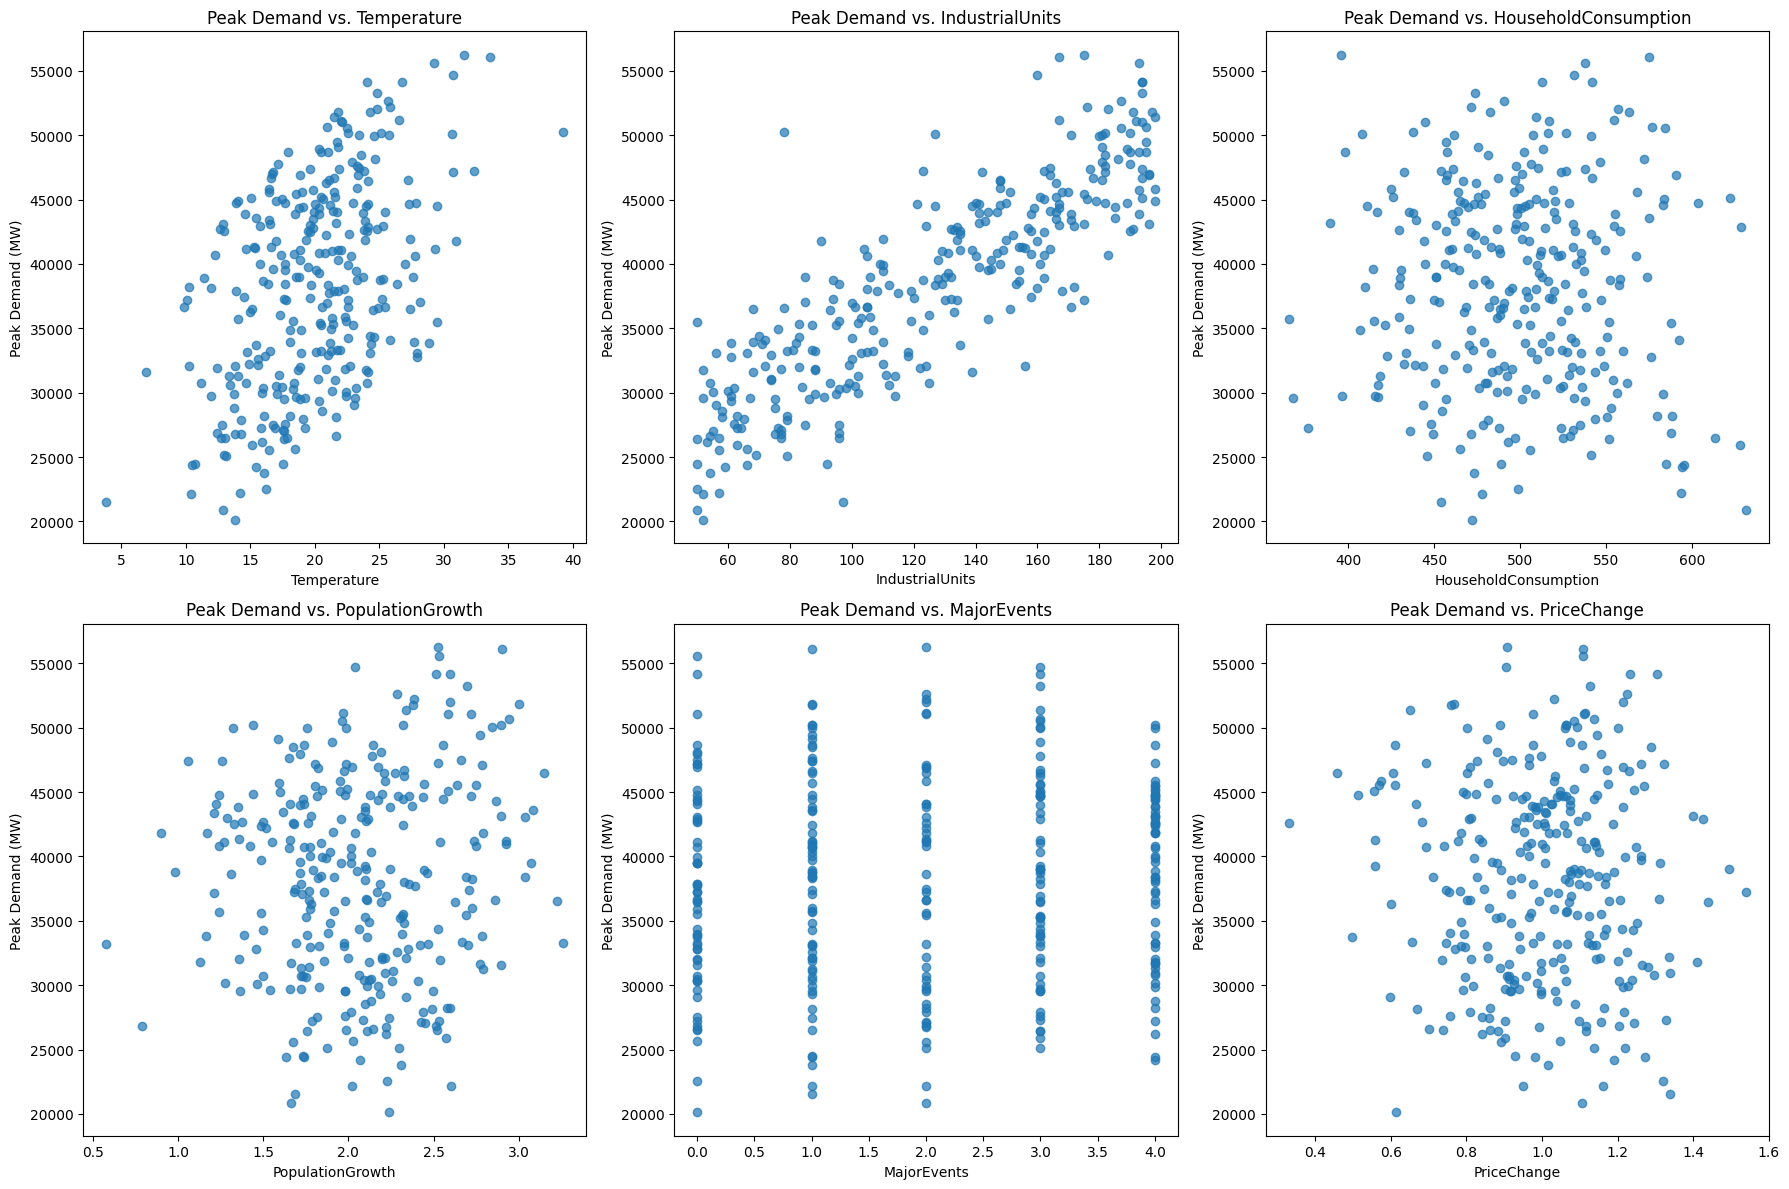

In [5]:
# Visualizing the relationship between features and peak demand
plt.figure(figsize=(18, 12))

# Plotting each feature vs. peak demand in subplots
for i, feature in enumerate(data.columns[:-1], 1):  # Exclude the last column (PeakDemand) for plotting
    plt.subplot(2, 3, i)
    plt.scatter(data[feature], data['PeakDemand'], alpha=0.7)
    plt.title(f'Peak Demand vs. {feature}')
    plt.xlabel(f'{feature}')
    plt.ylabel('Peak Demand (MW)')

plt.tight_layout()
plt.show()

The way in which we train a regression model is very similar to a classification model. The main difference you will see in the code block below is instead of creating a classification report we display a summary of the model. There is a lot of information in thsi summary, we will look into these metrics in more detail below.

In [6]:
# Data splitting
x = data[['Temperature', 'IndustrialUnits', 'HouseholdConsumption', 'PopulationGrowth', 'MajorEvents', 'PriceChange']]
y = data['PeakDemand']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Model Training we are using the statsmodel library because it gives us the ability to retrieve a summary of the model using model_fit.summary() 
model = sm.OLS(y_train, x_train)
model_fit = model.fit()

# Predictions and Evaluation
y_pred = model_fit.predict(x_test)

# There are a lot of numbers shown in this summary, we will cover them in detail below
print(model_fit.summary())


                                 OLS Regression Results                                
Dep. Variable:             PeakDemand   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          5.625e+04
Date:                Sun, 12 Jan 2025   Prob (F-statistic):                        0.00
Time:                        22:03:56   Log-Likelihood:                         -1740.1
No. Observations:                 210   AIC:                                      3492.
Df Residuals:                     204   BIC:                                      3512.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [7]:
# Single Sample Prediction
single_sample = x_test.iloc[1]
actual_load = y_test.iloc[1]

single_pred = model_fit.predict(single_sample)

print("Feature Data for Single Sample:")
print(f"{single_sample}\n")
print(f"Peak Demand Prediction: {single_pred.to_numpy()[0]}")
print(f"Actual Peak Demand: {actual_load}")


Feature Data for Single Sample:
Temperature              28.162057
IndustrialUnits          85.000000
HouseholdConsumption    452.530056
PopulationGrowth          1.724847
MajorEvents               1.000000
PriceChange               0.917716
Name: 266, dtype: float64

Peak Demand Prediction: 37665.83277849073
Actual Peak Demand: 37078.346748095966


Something to note is that for linear models the training or line fitting step only takes one iteration (Normal Equation. linear algebra. orthogonal projections etc) and converges on the global minimum of the objective function.

# **Evaluating Model Performance**
Evaluating a machine learning model allows us to assess its effectiveness in solving a particular problem. It helps us answer questions like:

1. What is the best way to determine model performance?
2. Is the model performing well to make reliable predictions?
3. Does it generalise well to unseen data?
4. How does it compare to other models or benchmarks?
5. What are the limitations and weaknesses of the model?

By obtaining answers to these questions, we can refine and improve our models, ensuring they deliver meaningful insights.

When evaluating a machine learning model, it is essential to choose appropriate evaluation metrics. The choice of metric depends on the problem at hand and the nature of the data. The selected metrics depends on if we are looking at a classification task or regression task.

An important aspect of evaluating models is identifying whether it is overfitting or underfitting, enabling us to adjust the models accordingly. Overfitting occurs when a regression model fits the training data too closely, leading to poor performance on unseen data. On the other hand, underfitting refers to a model that doesn’t capture the underlying patterns in the data.

## Training and Test Data Split
One of the first key pre-modelling features to implement is splitting the data into two subsets; training and testing. The model is trained on the training set, and its performance is evaluated on the test set. This approach provides an estimate of how well the model performs on new, unseen data.

To ensure a fair evaluation, it is important to randomly shuffle the data before splitting it into training and test sets. This helps prevent any biases that might be present in the original ordering of the data. However, if you shuffle time series data this may cause errors in model training. Instead it is better to use time-series cross validation, which we will look at in more detail below.

Using a train test split in unsupervised learning tasks is not a common practice. This is because the test data is used to see how well the model fit to what we expect. Because unsupervised learning does not have a set expected output it is challenging to evaluate its performance based on a test set.

### Training, Validation and Test Data Split
In some cases you may have a training, validation and test data split. The validation dataset is used as a data set to tune the model hyper parameters. Tuning will finish when the optimum set of hyper parameters has been found by minimising losses on the validation set. After this, the test set is used as a completely unseen set of data to evaluate the model to prevent any bias. 

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

# This just creates a synthetic dataset suitable for a regression task. It creates a feature dataset (x) with 4 sets of data, each with 10000 samples and a predictor dataset (y).
X, Y = make_regression(n_samples = 10000, n_features = 4, n_informative = 4)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,shuffle=True, train_size=0.8)


## Regression Metrics and Visualisations

### Metrics
These metrics quantify the model’s ability to predict continuous values accurately. You can not calculate the accuracy of regression models as you would classification models. Instead, you calculate the error of the predictions, also known as residuals. A residual is the difference between the actual value and the predicted value. 

<center>
<img src="https://lh4.googleusercontent.com/JyWJqWbIukHV02CkLI5WvzpfQGdJjYtLshg7GypE0eBUmjkJ3xlFsEhWc5oXMIo3i-FCaBaG3RdUg3Bh-2td6JSnwyOgalWUlKd2BM6x5gYNyKfD5nKmq7LkthCRN3GBKkquMK4BOBoVmYgiQnF9tCY" width="500"/>
</center>

There are many different ways to calculate the error on your predictions, below are some of the most common. 
Some common notations to cover:

- $y_{i}$ - The actual values, also known as target, independent or response values
- $\hat{y_{i}}$ - The predicted values
- $\bar{y_{i}}$ - The mean of our actual values
- $N$ - Number of samples



#### 1. Mean Squared error (MSE):
MSE is calculated as the mean of the squared differences between predicted and actual values in a dataset. Squaring the difference has the effect of creating only positive error values, as well as inflating larger errors. This has the effect of 'punishing' models more for larger errors. A good MSE is relative to the dataset, so care needs to be taken on how the error is interpreted. The units of MSE are squared units, this can be quite confusing if for example our target value is kW, then our MSE would be kW squared. Therefore, root mean squared error (RMSE) can be used instead. 

$$
MSE = \frac{1}{N}\sum_{i=1}^{N}(y_{i}-\hat{y_{i}})^{2}
$$

We can see in the plot below with a decreasing predicted value where the actual value is 1, our MSE goes up exponentially.


<center>
<img src="https://machinelearningmastery.com/wp-content/uploads/2020/12/Line-Plot-of-the-Increase-Square-Error-with-Predictions.png" width="700"/>
</center>


#### 2. Root Mean Squared Error (RMSE):
RMSE is an extension of MSE, where the result is square rooted so that the units of RMSE are the same as the original data. Doing so also ensures that the resultant error remains positive, but also punishes larger errors less than MSE. Therefore, it is sometimes the practice to use MSE to train regression and then use RMSE to evaluate and repot the performance. Similar to MSE, a good RMSE value is relative to your dataset. 

$$
RMSE = \sqrt{\frac{1}{N}\sum_{i=1}^{N}(y_{i}-\hat{y_{i}})^{2}}
$$

#### 3. Mean Absoute Error (MAE):
MAE is calculated as the average of the absolute error. Like RMSE, the units of MAE match the original data. However, unlike RMSE and MSE the changes in MAE are linear. This means that MAE does not inflate the errors but instead the scores increase linearly with increase in error. Again, a good MAE value is relative to your specific dataset.

$$
MAE = \frac{1}{N}\sum_{i=1}^{N}\left|y_{i}-\hat{y_{i}}\right|
$$

#### 4. Mean Absolute Percentage Error (MAPE):
MAPE is popular on the reporting side as it is expressed as a percentage which makes it easier to interpret. This makes it scale independent so it can be used to compare predictions on different scales. MAPE is undefined when the actuals are zero, and can be very extreme when very close to zero. It is also asymmetric and puts heavier penalty on negative errors (when predictions are higher than actuals) than on positive errors. Therefore optimising for MAPE will favour models that underpredict rather than overpredict. If you wish to use MAPE for your optimisation or evaluation it may be worth doing some further investigation before hand wether this is the most optimum metric to use. 

$$
MAPE = \frac{1}{N}\sum_{i=1}^{N}\left| \frac{y_{i}-\hat{y_{i}}}{y_{i}} \right|
$$


##### 5. Other Error Metrics:
There are quite a few other error metrics worth exploring in more detail.

1. **Relative RMSE (RRMSE):** Normalizes RMSE by the mean or range of the observed data to make it scale-independent.   
2. **Root Mean Squared Relative Error (RMSRE):** Computes RMSE relative to observed values, emphasizing proportional differences.  
3. **Standardized RMSE (SRMSE):** Scales RMSE by the standard deviation of observed data to assess model performance in terms of variability.  
4. **Mean Squared Reduced Error (MSRE):** Modifies RMSE to account for data scaling or transformations, focusing on relative error.  
5. **Relative MAE (RMAE):** Expresses MAE as a ratio to observed values to reflect proportional errors.  
6. **Symmetric MAPE (sMAPE):** Balances over- and under-predictions by symmetrically normalizing errors, avoiding bias in error computation.  


#### 6. R-squared (R2):
Also known as the coefficient of determiniation, represents the proportion of variance explained by a model. Another way of saying this is:

**"How much of a change in the target variable can be explained by the features"**

$$
R^{2} = 1- \frac{RSS}{TSS} = 1 - \frac{\sum_{i=1}^{N}(y_{i}-\hat{y_{i}})^{2}}{\sum_{i=1}^{N}(y_{i}-\bar{y_{i}})^{2}}
$$

- Residual Sum of Squares (RSS): This is the sum of squared residuals. This captures the prediction error of a model.
- Total Sum of Squares (TSS): This is the sum of squared residuals of a simple model that is just the mean of our actual values. TSS is the variance that a simple mean model can not explain. 

You are comparing the fit of a model to that of a simple mean model. The closer the value is to 1, the better our model is performing. 

<center>
<img src="https://lh4.googleusercontent.com/RkCU8UUjDqiCvcm9nUy7cDteIfWh5jVirD_VIFFbNYBrK5I7zBKtbnRXwvwo8RNjzlfsqH-beEpXFyBkn5MSJpxZi0jFwOF6EjLqeTKrc7wME3FtKctGavPj_hLuAbL3HsY2NhMC3Wj6jO7liwDqLgo" width="700"/>
</center>

An important limitation about R-squared is that it assumes that every feature helps explain the variation in the target. For this reason, if you continue adding features to a linear model estimated using ordinary least squares (OLS), the value of R-squared with either remain unchanged or increase, it will never decrease. A solution to this problem is the adjusted R-squared.

#### 7. Adjusted R-Squared: 
Very similar to R-squared, adjusted R-squared additionally penalises adding features that are not useful for predicting the target. The value of the adjusted R-squared decreases if the increase in R-squared caused by adding new features is not significant enough. 

$$
Adjusted\ R^{2} = 1 - \frac{(1 - R^{2})(N - 1)}{N - p - 1}
$$
Where:
- $R^{2}$ is sampled R-squared
- $N$ is Total sample size
- $p$ is number of independent variables






### Hypothesis-Based Metrics:
Each of the following metrics is based on an initial hypothesis (called the null hypothesis) about the regression model. The metric gives a probability of how correct the null hypothesis is. In most cases if the probability is less than 5% then the null hypothesis is rejected. 

##### 8. P>|z|:
Tests whether or not a coefficient has an impact on the linear regression prediction. The null hypothesis is that there is no relationship between the predictor and response variables. If we get a value less than 0.05 then the null hypothesis is rejected, meaning there is a relationship between that predictor variable and the response variable. The P>|z| can be used to remove features from the model that do not have a large enough impact on the resposne variable.

#### 9. F-test:
Explains whether the regression model as a whole explains a significant amount of the variation in the dependent variable. The null hypothesis is that the response variable cannot be represented as a function of any of the predictor variables. The f-test value will be maximised and the p-value minimised. 

#### 10. Ljung-Box (Q):
Tests whether the errors from our fitted model are white noise, or whether there is still some underlying pattern. If there is still some underlying pattern in the errors then we can say that the model has not found the best fit with the features available. The null hypothesis is that the model shows no lack in fit (simply, the model has a good fit). Therefore, it is desirable to get a probability >5% to accept our null hypothesis, meaning our model has a good fit and the residuals are independently distributed. 

The middle plot uses something called the Autocorrelation Function (ACF), you can read up more about this [here](https://www.geeksforgeeks.org/autocorrelation/)

<center>
<img src="https://www.researchgate.net/profile/Younsook-Yeo/publication/309905822/figure/fig6/AS:427296717840397@1478886884466/Figure-9-Ljung-Box-Test-ARI-1-1-Model.png
" width="700"/>
</center>

#### 11. Heteroscedasticity (H):
Heteroscedasticity refers to the unequal scatter of residuals over the range of the measured values. Heteroscedasticity is a problem beacuse ordinary least squares regression is under the assumption that the residuals are drawn from a population that has a constant variance and is uniformly distributed (homoscedasticity). The null hypothesis of this test (known as the Breusch-Pagan test) is that homoscedasticity is present meaning the residuals are distributed with equal variance. If we fail the hypothesis, heteroscedasticity is present. Therefore, the objective is to accept the null hypothesis and get a probability >5%. If heteroscedasticity is present, one solution is to transform the target variable. This could be through using the log or exponential of the target variable.
<center>
<img src="https://fourpillarfreedom.com/wp-content/uploads/2019/02/het2.jpg" width="700"/>
</center>

#### 12. Jarque-Bera (JB):
This test is used to determine if a dataset follows a normal distribution. The test works by calculating the skewness and kurtosis of the dataset, which are measures of the shape of the distribution. Normality in a dataset is important because many statistical methods assume that the data is normally distributed for accurate conclusions and predictions. The null hypothesis is that the data is normally distributed, a probability >5% means the null hypothesis is accepted, and it can be said that the data is normally distributed.
<center>
<img src="https://www.researchgate.net/publication/285956550/figure/fig2/AS:1023600534499334@1621056793778/Normality-Test-of-Jarque-Bera-Gretl.jpg" width="700"/>
</center>


Now we can look at our regression model summary in more detail. From the summary we can say:
1. **Adj. R-squared** - Very close to 1, so our model has an overall good fit.
2. **Prob (F-statistic)** - Very low probability indicates that our model explains a large amount of the variation in the dependent variable.
3. **P>|t|** - The probability for 'HouseholdConsumption' and 'PriceChange' are both much greater than 0.05, indicating they do not have an impact on the model.
4. **Omnibus and Jarque-Bera** - These two tests are very similar, they both test for the normality of residuals. Both probabilities are much greater than 0.05, so we accept the hypothesis and can say that the residuals follow a normal distribution.
5. **Durbin-Watson** - This test is very similar to the Ljung-Box test. It tests for autocorrelation (if there is a relationship between the current data point and previous points). Because the model has a large Durbin-Watson value we can say that the errors are random noise and do not have any autocorrelation.
6. **Breusch-Pagan Test** - With a p-value > 0.05 we can say that the residuals do not contain heteroscedastisity (changing variance), but instead contain homoscedasticity (constant variance).

In [9]:
print(model_fit.summary())

# Statsmodel does not inherently come with a heteroscedastisity test, so we will calculate this separately
# Conduct the Breusch-Pagan test
# To conduct this test the data requires a constant
x_with_constant = sm.add_constant(x_train)
het_result = sms.het_breuschpagan(model_fit.resid,x_with_constant)
print(f"\n'Lagrange multiplier statistic': {het_result[0]}")
print(f"'p-value': {het_result[1]}")


                                 OLS Regression Results                                
Dep. Variable:             PeakDemand   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          5.625e+04
Date:                Sun, 12 Jan 2025   Prob (F-statistic):                        0.00
Time:                        22:04:12   Log-Likelihood:                         -1740.1
No. Observations:                 210   AIC:                                      3492.
Df Residuals:                     204   BIC:                                      3512.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

## Regression Visualisations

Visualizations are crucial in regression analysis to assess the relationships in data, validate model assumptions, and evaluate model performance. Below is an explanation of commonly used regression plots, their theoretical basis, and why they are used.


### 1. Correlation Heatmap
The correlation heatmap is used to visualise the pairwise linear correlations between features and the target variable. It is used to identify features that are strongly correlated with the target variable. It is also used to identify if there is any correlation between features, indicating multicollinearity. Multicollinearity causes major issues in regression tasks as it can destabilise regression coefficients. It is important then if there is major correlation between two features to remove one of them for best results. Some types of models like Ridge and Lasso Regression automatically reduce or remove terms if multicollinearity is present.


<Axes: >

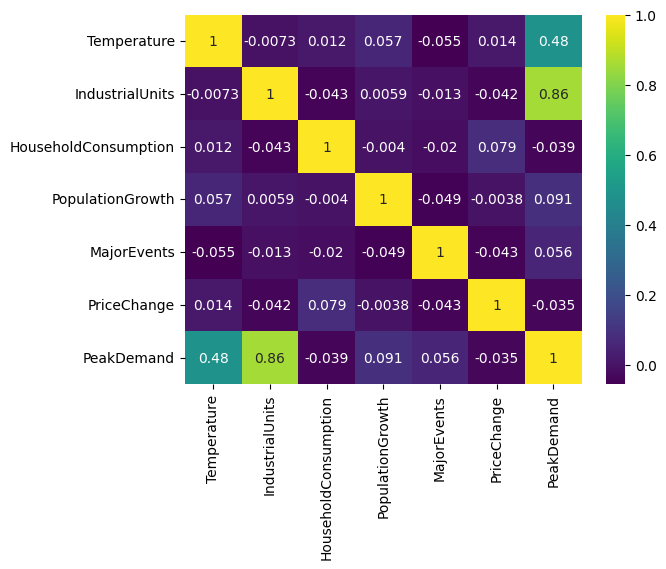

In [10]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix,annot=True, cmap="viridis")

### 2. Pairplot
The pairplot is used to visualise pairwise relationships between features and the target in a dataset. It displays scatter plots for each feature pair, helping identify relationships (e.g., linear, non-linear) and distributions. Useful for initial exploratory data analysis (EDA), identifying relationships and trends between variables and detect potential outliers.

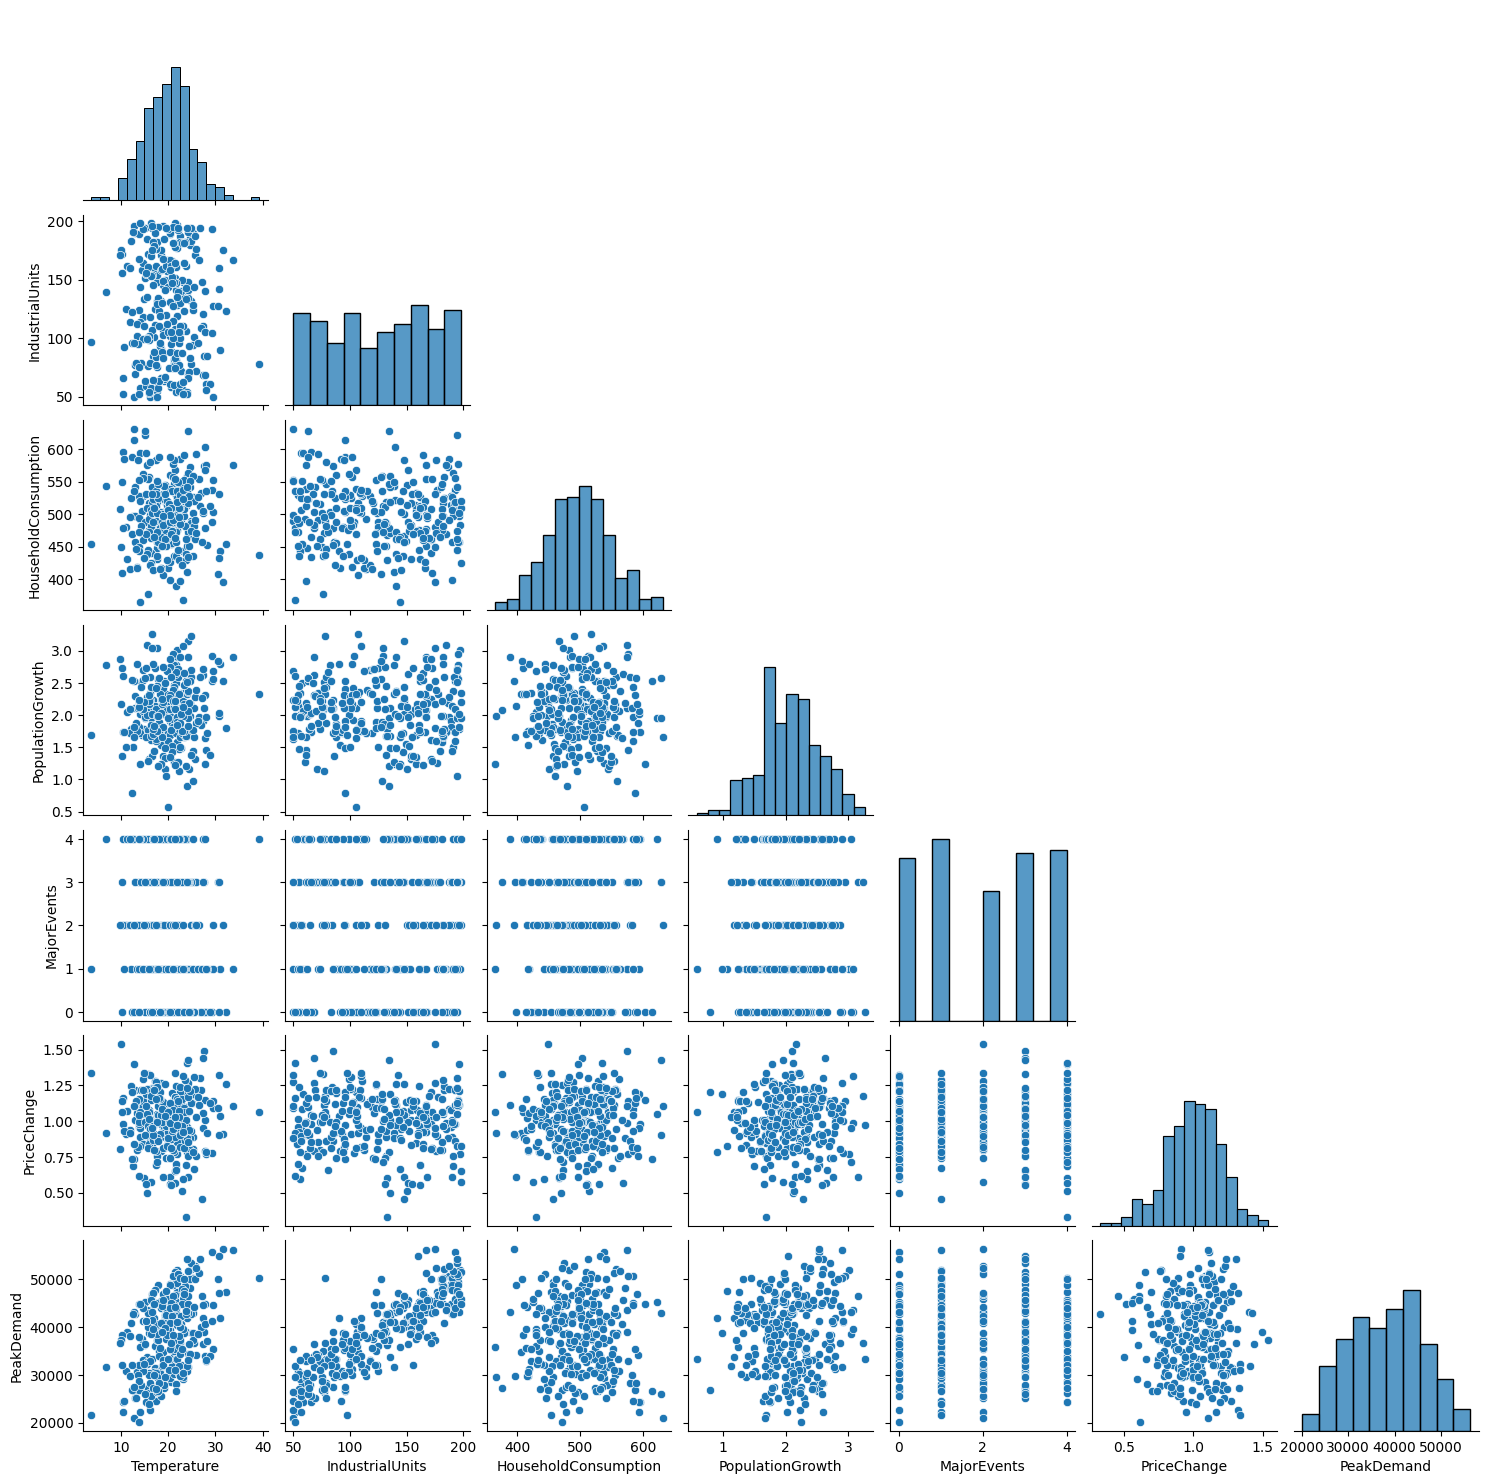

In [12]:
pairplot = sns.pairplot(data, corner=True)
pairplot.figure.set_size_inches(15, 15)

### 3. Quantile-Quantile (Q-Q), Cumulative Distribution Function (CDF) and Probability Density Function (PDF) Plots
All three of these plots check if the residuals (errors) follow a normal distribution. The assumption in linear regression is that the residuals should be normally distributed. If the residuals are not normally distributed then there are either errors in our model or dataset that need to be identified and fixed. The three plots display the following:

1. Q-Q Plot - Plots quantiles of residuals against quantiles of a normal distribution. Points should lie on or close to the diagonal line for normality.
2. PDF Plot - Plots the probability of residuals falling within a small interval around a particular value. Points should follow a normal distribution.
3. CDF Plot - The CDF is a cumulative view of the probabilities created in the PDF. Points should lie on or close to the sigmoid line created from a normal distribution


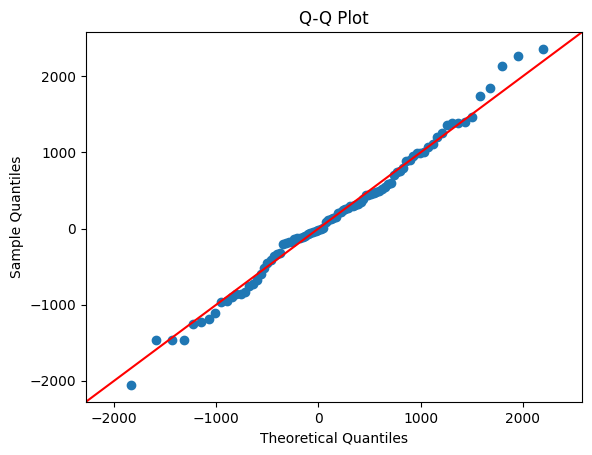

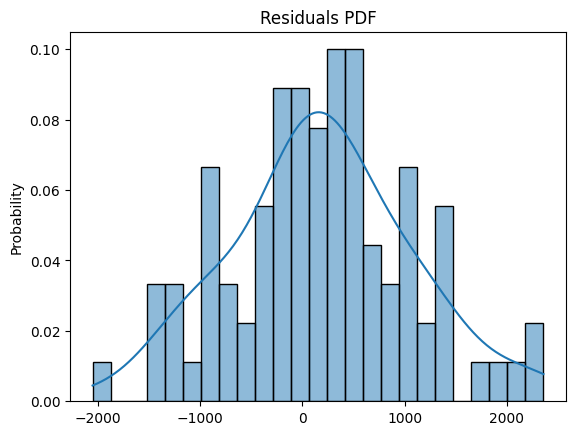

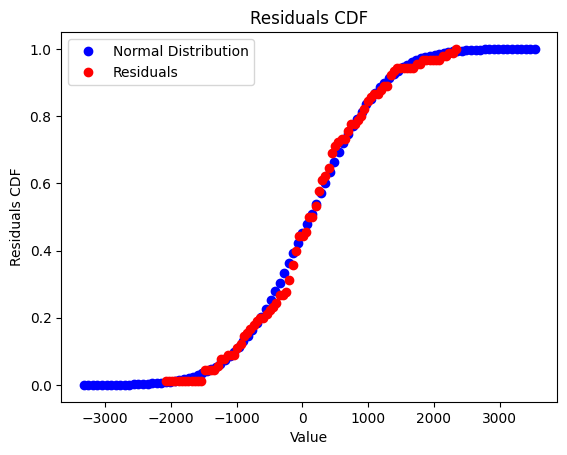

In [13]:
# Make sure to use the residuals of the test set, not the training set
resid = y_pred.values-y_test.values
mean = np.mean(resid)
std_dev = np.std(resid)
norm_data = np.random.normal(mean,std_dev,10000)

# QQ Plot
sm.qqplot(resid, loc=mean, scale=std_dev, line='45')
plt.title("Q-Q Plot")
plt.show()

## Probability Density Function
sns.histplot(resid,bins=25,stat="probability",kde=True)
#plt.hist(resid, bins=30, density=True)
plt.title("Residuals PDF")
plt.show()

# CDF Plot
n_test_samples = len(resid)
counts, start, dx, _ = scipy.stats.cumfreq(resid, numbins=n_test_samples)
x = np.arange(counts.size) * dx + start

counts_, start_, dx_, _ = scipy.stats.cumfreq(norm_data, numbins=100)
x_norm = np.arange(counts_.size) * dx_ + start_

plt.plot(x_norm, counts_/10000, 'bo', label ="Normal Distribution")
plt.plot(x, counts/n_test_samples, 'ro', label="Residuals")
plt.xlabel('Value')
plt.ylabel('Residuals CDF')
plt.title('Residuals CDF')
plt.legend()
plt.show()

### 4. Residual Plot
Used to assess the relationship between residuals and predicted values to check for heteroscedasticity. Residuals should be randomly scattered around 0 with no pattern. Patterns suggest issues like heteroscedasticity or non-linearity. 


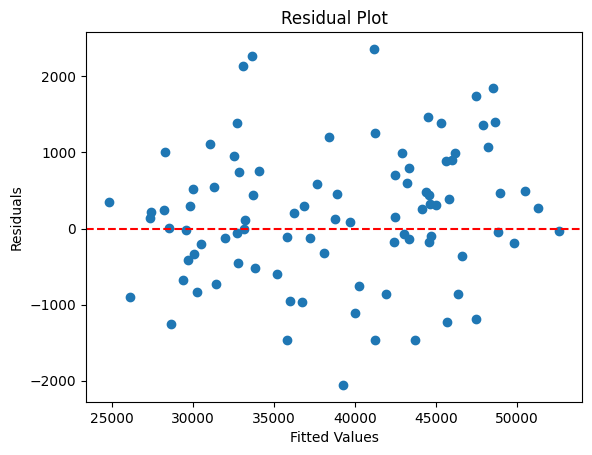

In [14]:
plt.scatter(y_pred, resid)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

### 5. Predicted vs. Actual Scatter Plot
Compare predicted values with actual values to evaluate model performance. The points should be closely alligned along the diagonal.

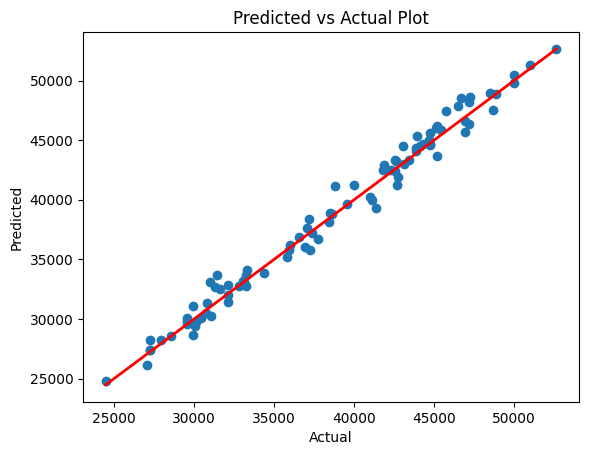

In [15]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual Plot")
plt.show()

## Other types of Regression
Here are some other methods for regression

1. **Ridge Regression (L2 Regularization)**: Used to prevent overfitting in linear regression models by adding an L2 penalty term.
2. **Lasso Regression (L1 Regularization)**: Prevents overfitting by adding an L1 penalty term, aiding in feature selection.
3. **Elastic Net Regression**: Combines both L1 and L2 regularization, offering a balance between feature selection and handling correlated features.
4. **Logistic Regression**: Used for binary classification tasks, modeling the probability of an instance belonging to a particular class.
5. **Poisson Regression**: Used when the dependent variable is a count, modeling count data using the Poisson distribution.
6. **RANSAC (RANdom SAmple Consensus)**: An algorithm for robust regression in the presence of outliers.
7. **Support Vector Regression (SVR)**: Extends the concept of Support Vector Machines (SVM) to regression problems.
8. **Decision Tree Regression**: Uses decision trees to partition data and predict averages within segments.
9. **Random Forest Regression**: An ensemble technique combining multiple decision trees to improve prediction accuracy.
10. **Gradient Boosting Regression**: Builds an ensemble of decision trees sequentially, correcting errors in each step.
11. **Kernel Regression**: Uses kernel functions to model non-linear relationships.
12. **Quantile Regression**: Models different quantiles of the target variable.
13. **Bayesian Regression**: Incorporates prior information and uncertainty into regression analysis.
14. **Robust Regression**: Designed to handle outliers and deviations from model assumptions.
15. **Generalized Additive Models (GAM)**: Extends linear models to capture non-linear relationships.


# **Challenge Question**
A university professor is trying to determine what factors impact the grades of his students (known as 'Performance'). So he created a dataframe that contains information about each of his students that he thought would be contributing factors to their performance. Your task is to analyse this dataset and create a linear regression model that best predicts the 'Performance' of each student. 

You will have to do the following:
1. Create visualisations of the dataset. 
2. Determine if multicollinearity is present and make justifications on which features you will use for your model.
3. Split the dataset into the features and predictor
4. Split the features and predictor into training and testing
5. Select and train a linear regression model
6. Create visualisations of the model predictions and justify how well the model performed

In [3]:
challenge_df.head()

,HoursStudied,PrevScore,HoursSleep,PracticeExamHrs,LivingAtHome,HoursExercising,Performance
0,2.996321,1.295931,6.122017,3.369126,0,0.787271,13.282934
1,7.605714,3.793307,6.173120,4.192471,1,0.946871,56.705774
2,5.855952,6.110621,6.773521,2.059683,0,1.709095,52.240667
3,4.789268,5.125574,7.367366,2.929263,1,0.680009,49.737611
4,1.248149,5.645928,7.913585,-2.011673,0,1.739299,19.971848


### Visualise Data
We will create two visualisations of the dataset, the correlation heatmap and pairplot. 

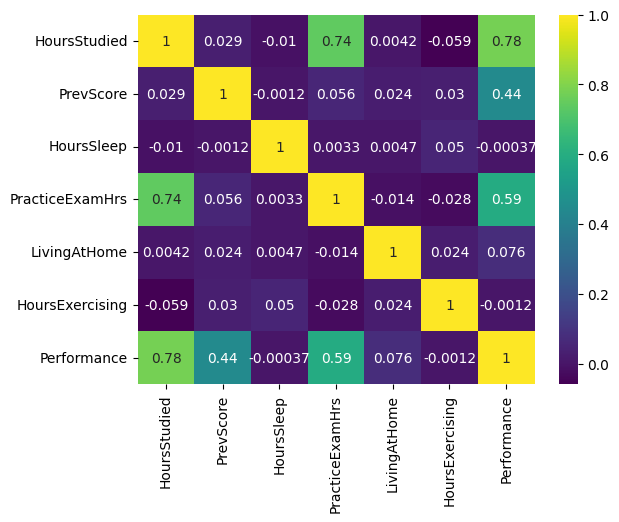

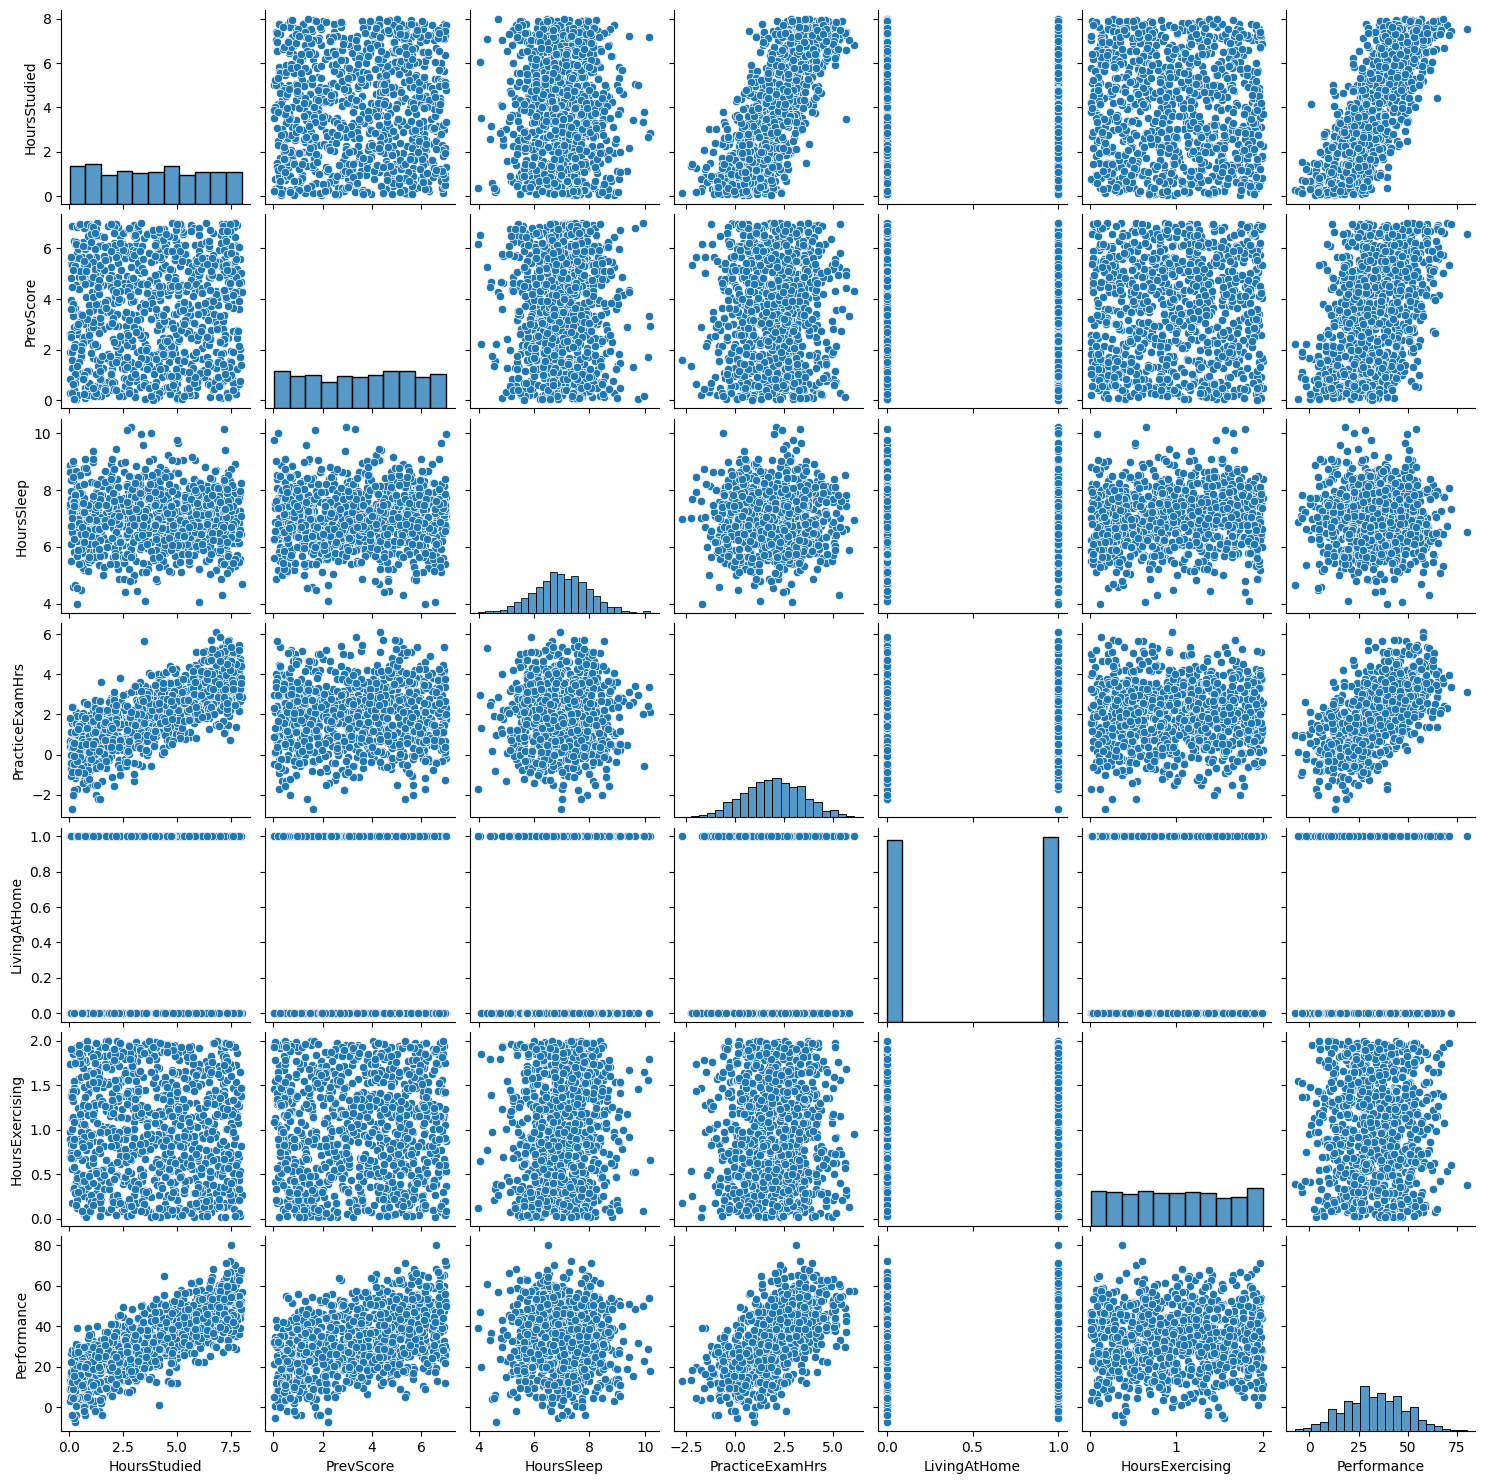

In [3]:
corr_matrix = challenge_df.corr()
sns.heatmap(corr_matrix,annot=True, cmap="viridis")

pairplot = sns.pairplot(challenge_df)
pairplot.figure.set_size_inches(15, 15)

From the visualisations above we can make several observations:
1. The 'HourseStudied', 'PrevScore' and 'PracticeExamHrs' features have high correlation with our 'Performance' target variable, so we will certainly use these features to predict 'Performance'. 'LivingAtHome' has a slight positive correlation so we will keep it and see what contribution it has. Overall, we will drop 'HoursSleep' and 'HoursExercising' from our features and keep the rest.
2. There does not seem to be any non-linear relationships with our target variable. This works in our favour because we are using linear regression!
3. 'PracticeExamHrs', 'HoursSleep' and 'Performance' all have normal distributions, whilst the other features have uniform distributions. This does make it more challenging for the model to find an optimum solution as regression works best on normally distributed data. 
4. 'LivingAtHome' is a boolean value (either 0 or 1). One-hot Encoding is a useful way to implement categorial data with more than 2 categories into a regression problem. Luckily 'LivingAtHome' only has 2 categories, either still at home (1) or not at home (0). This column can be left in, but it is important to remember that the regression coefficient calculate for 'LivingAtHome' will just be a constant added to the result when 'LivingAtHome' is 1, and won't be added when the feature is 0. 
5. There is a high correlation between 'PracticeExamHrs' and 'HoursStudied'. This means that the dataset contains multicollinearity.Multicollinearity impacts the coefficient estimates but it does not impact goodness of fit. This means if your main goal is to make predictions then we can ignore the multicollinearity. However if the goal is to understand the exact relationship between the features and target variable then we do need to be concerned about mutlicollinearity. For the professor, he cares about what features impact 'Performance' and how these features affect it. Therefore, we need to do something about the multicollinearity. There are several things we can do:
- Remove one of the features that have the least impact on the 'Performance'
- Combine 'HoursStudied' and 'PracticeExamHrs' into a single variable
- Use a regression model that handles multicollinearity, like Ridge or Lasso Regression


We will pick the quickest solution and drop the 'PracticeExamHrs' feature because it has a lower correlation with 'Performance' than 'HoursStudied' does.


### Split Data
Based on our analysis above, we can split the dataset into 'HoursStudied', 'PrevScore' and 'LivingAtHome' as our features and 'Performance' as our target variable. We can split into training and test data and shuffle the split to ensure there is no bias.

In [4]:
from sklearn.model_selection import train_test_split

x = challenge_df[['HoursStudied', 'PrevScore','LivingAtHome']]
y = challenge_df["Performance"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

### Model Training
We can now train the model on the training dataset and then create a summary of the model to see how it is performing.


In [5]:


# Model Training we are using the statsmodel library because it gives us the ability to retrieve a summary of the model using model_fit.summary() 
model = sm.OLS(y_train, x_train)
model_fit = model.fit()

# Predictions and Evaluation
y_pred = model_fit.predict(x_test)

# There are a lot of numbers shown in this summary, we will cover them in detail below
print(model_fit.summary())


                                 OLS Regression Results                                
Dep. Variable:            Performance   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                              7357.
Date:                Thu, 16 Jan 2025   Prob (F-statistic):                        0.00
Time:                        07:09:36   Log-Likelihood:                         -2670.0
No. Observations:                 800   AIC:                                      5346.
Df Residuals:                     797   BIC:                                      5360.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [6]:
x_with_constant = sm.add_constant(x_train)
het_result = sms.het_breuschpagan(model_fit.resid,x_with_constant)
print(f"\n'Lagrange multiplier statistic': {het_result[0]}")
print(f"'p-value': {het_result[1]}")




'Lagrange multiplier statistic': 0.17292181935628648
'p-value': 0.9818375097211678


In [8]:
from sklearn.metrics import mean_squared_error, r2_score

# Later versions of sklearn have root_mean_squared_error, for simplicity we will use mean_squared_error and use np.sqrt on this to get the same number

rmse = np.sqrt(mean_squared_error(y_test,y_pred))

print(f"RMSE: {rmse}")


RMSE: 7.565355664376324


Model Output Analysis:
1. Adj. R-squared: Relatively close to 1, model has an overall good fit
2. Prob (F-statistic): Very low probability indicates that our model explains a large amount of the variation in the dependent variable
3. P>|t|: All the probabilities are P<0.05, so we can say that all three features have an impact on the model
4. Omnibus and Jarque-Bera: Both are P>0.05 which indicates the residuals are normally distributed. This means our model has found a good fit.
5. Durbin-Watson: The low value of ~2 (similar to Omnibus of ~1.3 and Jarque-Bera ~1.1) indicates that the null hypothesis has been accepted. Meaning we can say the errors are white noise with no autocorrelation.
6. Breusch-Pagan Test: High p-value means we accept the hypothesis, and can say the data is monoscedastic (constant variance across the residuals)
7. RMSE - Considering our 'Performance' ranges from 0 to 75, an RMSE of 7.5 shows a relatively good fit with some error.


### Visualisations
The residual plot shows no relationship so we can conclude the model has no heteroscedasticity and the chosen features are appropriate to predict 'Performance'.

Scatter actual values against predictions shows a mostly relative fit but still with some noise. This either means we have an exterior feature to add to the mode, or the 'Performance' value has a large amount of white noise.

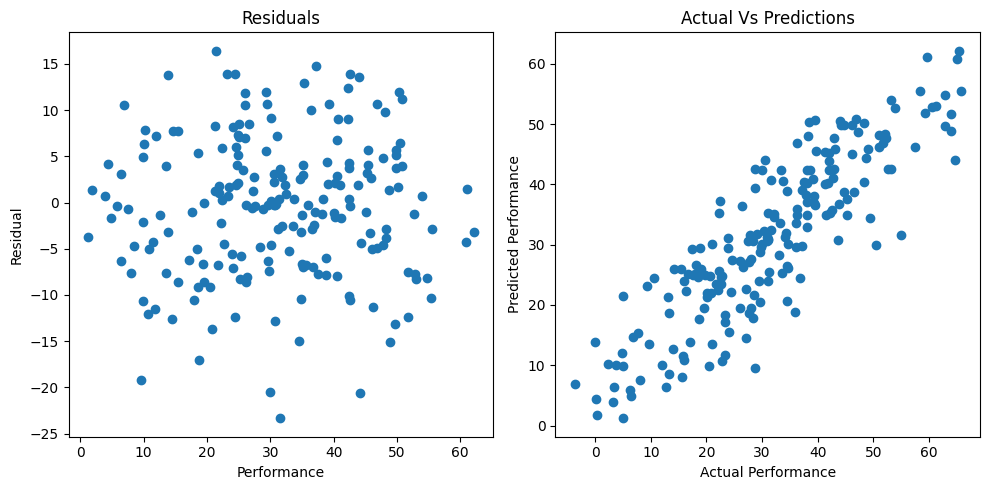

In [9]:
# Make sure to use the residuals of the test set, not the training set
resid = y_pred.values-y_test.values

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(y_pred,resid)
plt.xlabel("Performance")
plt.ylabel("Residual")
plt.title("Residuals")
plt.subplot(1,2,2)
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Performance")
plt.ylabel("Predicted Performance")
plt.title("Actual Vs Predictions")
plt.tight_layout()
plt.show()

Both of the plots below show normality in the residuals, so the model has done the best it can to learn the relationships in the dataset, and the chosen features are good at explaining the overall variance in 'Performance'.

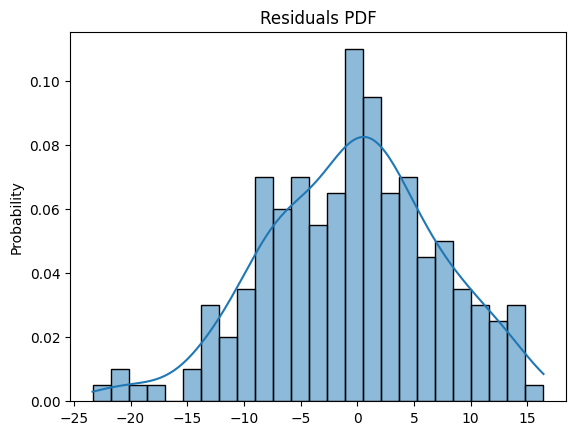

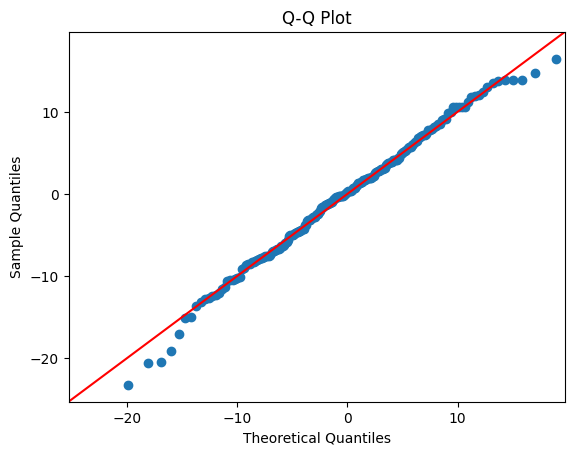

In [11]:
mean = np.mean(resid)
std_dev = np.std(resid)
norm_data = np.random.normal(mean,std_dev,10000)

# Probability Density Function
sns.histplot(resid,bins=25,stat="probability",kde=True)
plt.title("Residuals PDF")
plt.show()

# QQ Plot
sm.qqplot(resid, loc=mean, scale=std_dev, line='45')
plt.title("Q-Q Plot")
plt.show()

### Improvements

The model has performed relatively well, but we can still see some noise when we scatter actuals against predictions. Because the residuals show no patterns in the residual scatter plot, it is appropriate to conclude that there is no other linear feature we can add to the model to increase performance. There are several things we can explore to improve performance:
1. Combine the features with collinearity into a single feature and test performance
2. Implement Lasso or Ridge regression to optimise coefficients for collinear features. Remember though, this makes it more challenging to justify the importance of each feature individually to 'Performance'
3. Explore other features not listed and see if they hold any relationship with 'Performance'. If the relationship is non-linear, then polynomial regression may become our best friend!
4. Maybe our dataset needs to be cleaned? Are there any outliers or weird anomalies that the model is having to fit to.

Can you think of any more?

# **Classification** 
Classification tasks involve predicting a categorical, or discrete, output variable, known as y. These categories, often called classes or labels, define the distinct groups into which the inputs are classified. The primary objective in a classification problem is to determine the specific category or class an input (denoted as X) belongs to. Common applications of classification include email spam detection, where the aim is to categorize emails as 'spam' or 'not spam'; image recognition, which involves identifying the category that an image represents; and medical diagnosis, where the task could be to ascertain whether a patient has a certain disease. Classification problems can be either binary, involving two classes, or multi-class, where there are more than two classes to be predicted.

#### Example - Transformer Condition Classification
The example involves predicting the condition of electrical transformers. Using Scikit-Learn, a RandomForestClassifier is trained on synthetic data that simulates sensor readings like oil temperature, load percentage, and dissolved gas analysis. The model learns to classify each transformer's condition into categories such as 'Normal', 'Maintenance Needed', or 'Repair Required'. This classification is based on patterns it discovers in the training data. The effectiveness of the model is then evaluated on a separate test dataset to assess its predictive accuracy. Such an approach could be invaluable in practical settings for proactive maintenance and operational efficiency in energy management.

The mathematical description of how the RandomForestClassifier works is beyond the scope of this course and involves various structures in discrete mathematics (graphs, trees, combinatorics). If you would like to learn more about RandomForestClassifiers then follow this link. [Random Forest Algorithm in Machine Learning](https://www.geeksforgeeks.org/random-forest-algorithm-in-machine-learning/)

In [17]:
# In the code below we are creating a synthetic dataset

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Generate synthetic data
np.random.seed(0)
n_samples = 300
oil_temperature = np.random.normal(100, 10, n_samples)  # Simulated oil temperature readings
load_percentage = np.random.normal(60, 10, n_samples)  # Simulated load percentage
dissolved_gas_analysis = np.random.normal(30, 5, n_samples)  # Simulated dissolved gas analysis readings

# note we are making an assumption here that the data for these features is normally distributed

# Simple rules to assign labels based on imagined thresholds for transformer operation
conditions = [
    (oil_temperature < 105) & (load_percentage < 70) & (dissolved_gas_analysis < 35),
    ((oil_temperature >= 105) & (oil_temperature < 115)) | ((load_percentage >= 70) & (load_percentage < 80)) | ((dissolved_gas_analysis >= 35) & (dissolved_gas_analysis < 40)),
    (oil_temperature >= 115) | (load_percentage >= 80) | (dissolved_gas_analysis >= 40)
]

# Labels
choices = ['Normal', 'Maintenance Needed', 'Repair Required']
labels = np.select(conditions, choices, "Normal")

# this is an assumption about how a certain combination of the features (ie. oil_temp., load_perce. etc)
# implies a particular condition of the transformer (ie. Normal, Maitenance Needed etc etc)

# Creating DataFrame
data = pd.DataFrame({'Oil_Temperature': oil_temperature,
                     'Load_Percentage': load_percentage,
                     'Dissolved_Gas_Analysis': dissolved_gas_analysis,
                     'Condition': labels})

# Add noise/randomness to the condition labels
np.random.seed(1)
noise_level = 0.15  # 10% of the labels will be randomly changed
num_noisy_labels = int(noise_level * n_samples)
noisy_indices = np.random.choice(n_samples, num_noisy_labels, replace=False)

# Randomly change the labels at the noisy indices
for idx in noisy_indices:
    current_label = data.loc[idx, 'Condition']
    possible_labels = [label for label in choices if label != current_label]
    data.loc[idx, 'Condition'] = np.random.choice(possible_labels)


Below is a plot of each transformer and it's associated condition (Repair Required, Maintenance Needed and Normal). It should be mentioned that the plot only shows two dimensions of the transformer information; the load percentage and oil temperature. We are missing the dissolved gas analysis. This is why you can see an overlap between the conditions, because we are missing our third dimension. If we add in the third dimension it might become easier to see the separation between the different conditions.

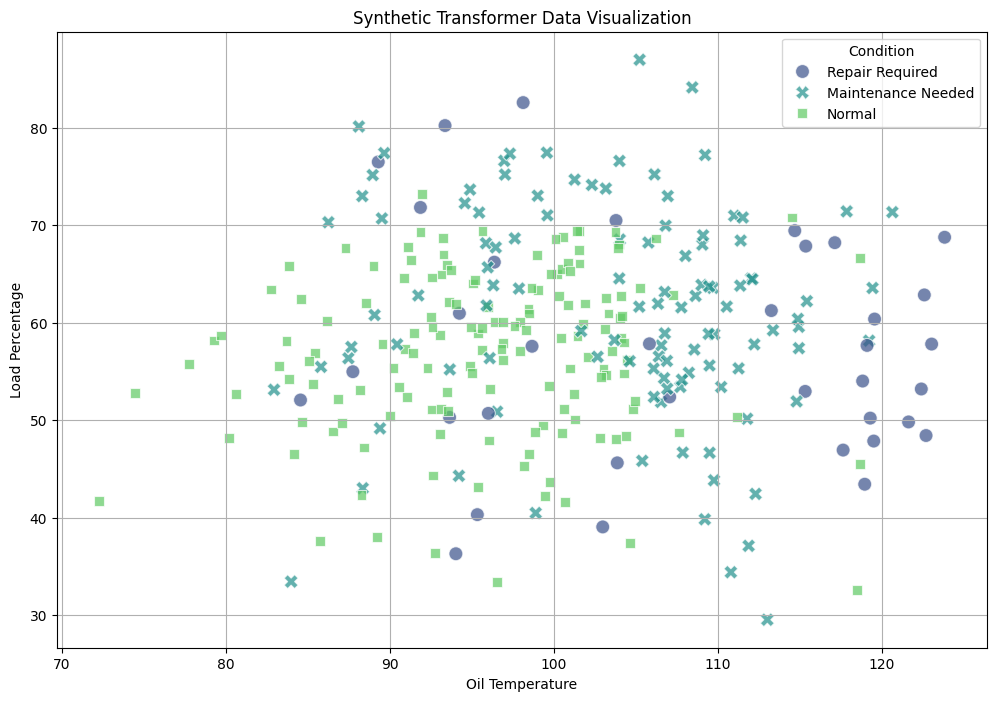

In [18]:
# Visualize the data
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Oil_Temperature', y='Load_Percentage', hue='Condition', style='Condition', data=data, palette='viridis', s=100, alpha=0.7)
plt.title('Synthetic Transformer Data Visualization')
plt.xlabel('Oil Temperature')
plt.ylabel('Load Percentage')
plt.legend(title='Condition')
plt.grid(True)
plt.show()

This is where all the magic or "machine learning" is happening. In most cases it's all done for you and packaged up into a nice function for you to use. The classification_report created with precision, recall and f1-score contains valuable information about how the model has performed. We will look into more detail below what all these terms mean.

In [19]:
# Splitting the dataset
X = data[['Oil_Temperature', 'Load_Percentage', 'Dissolved_Gas_Analysis']]
y = data['Condition']

# seperating a portion of the training data for training and a portion for testing the accuracy of the model
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating and training the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100) # n_estimators is a hyper parameter
clf.fit(x_train, y_train)

# Making predictions and evaluating the model
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

Maintenance Needed       0.85      0.78      0.82        37
            Normal       0.85      0.89      0.87        46
   Repair Required       0.50      0.57      0.53         7

          accuracy                           0.82        90
         macro avg       0.74      0.75      0.74        90
      weighted avg       0.83      0.82      0.82        90



In [20]:
# Prediction for single sample
single_sample = x_test.iloc[[0]]

single_pred = clf.predict(single_sample)

print(f"Features for Single Sample:")
print(f"{single_sample}\n")
print(f"Predicted Transformer Condition: {single_pred[0]}")
print(f"Actual Transformer Condition: {y_test.iloc[0]}")

Features for Single Sample:
     Oil_Temperature  Load_Percentage  Dissolved_Gas_Analysis
203       106.552637        57.657842               28.043915

Predicted Transformer Condition: Maintenance Needed
Actual Transformer Condition: Maintenance Needed


## Classification Metrics and Visualisations

### Confusion Matrix
One of the most important ways of evaluating a classification task is using a confusion matrix. It is a means of displaying the number of correctly and incorrectly labelled instances of each class. The confusion matrix provides greater detail into how the model performs at predicting each of the classes. 

![confusion_matrix](img/ConfMatrices.png)

#### Example:
Using our Jenny example above. The 'Dog' images can be called the Positive label, and 'Cat' images the Negative label.
- True Positive - Number of Dog images **correctly** labelled as "Dog"
- True Negative - Number of Cat images **correctly** labelled as "Cat"
- False Negative - Number of Dog images **incorrectly** labelled as "Cat"
- False Positive - Number of Cat images **incorrectly** labelled as "Dog"

We can create a confusion matrix for our transformer condition example.

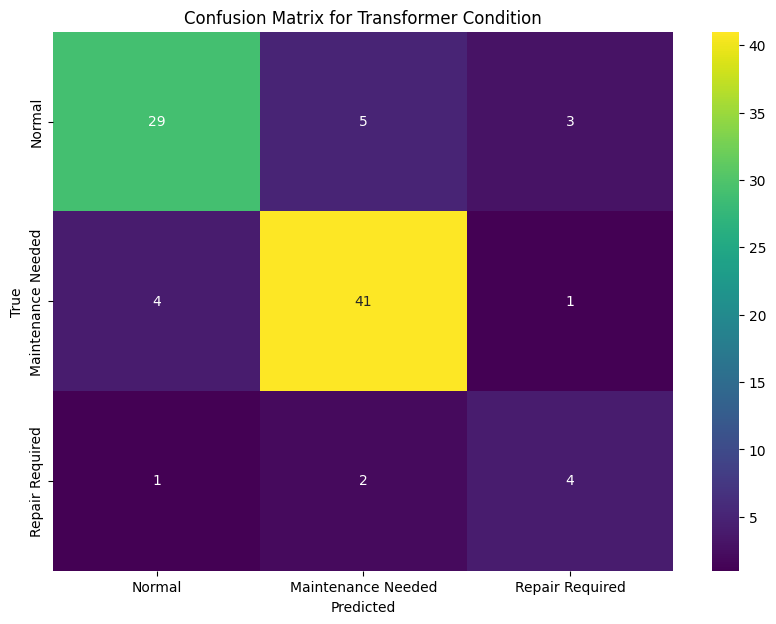

In [21]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=choices, yticklabels=choices)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Transformer Condition')
plt.show()

### Metrics
#### 1. Accuracy: 
**"How many of our predictions were correctly labelled"**. A percentage calculated from number of correct predictions divided by total predictions. Maximise towards 1. Only works best for balanced classes, with inbalanced classes it is biased towards the class with more samples.

$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$

#### 2. Precision: 
**"How many of the samples predicted as positive are actually positive"**. A percentage of true positives divided by all positives predicted. Maximise towards 1. A high score means the samples we have labelled as positives are actually positives. Maximising precision minimises the false-positive errors.

$$
Precision = \frac{TP}{TP + FP}
$$


#### 3. Recall (Also known as True Positive Rate): 
**"How many of our actual positive samples were correctly labelled as positive"**. A percentage of true positives divided by the sum of ground truth positives. Maximise towards 1. A high score means actual positives have been labelled correctly as positive. Maximising recall minimises the false-negative errors. 

$$
Recall = \frac{TP}{TP + FN}
$$

#### 4. Fasle Positive Rate (FPR):
**"How many of our actual negative samples were incorrectly labelled as positive"**. The percentage of false positives divided by the sum of ground truth negatives. Minimise towards 0. A high score means actual negatives have been labelled as positive.

$$
FPR = \frac{FP}{FP + TN}
$$

#### 5. F1 Score: 
Harmonic mean of the precision and recall. High F1 means high precision and recall. Low score means that among the samples predicted as positive, not many were actually positive. Gives good results on imbalanced classification problems. Does not give information on what type of error. It is used to maximise both precision and recall at the same time (maximise towards 1).

$$
F1 = \frac{2}{\frac{1}{Precision}+ \frac{1}{Recall}}
$$

#### 6. Fbeta: 
Harmonic mean of precision and recall where more attention is put on one depending on the beta value. 
- F0.5: More weight on precision, less on recall. Used when trying to minimise false positives.
- F1.0: Balanced weight. Used when both scores are important.
- F2.0: More weight on recall, less on precision. Used when trying to minimise false negatives.

$$
Fbeta = \frac{(1+\beta^{2}) * Precision * Recall}{\beta^{2}* Precision + Recall}
$$

We can look at our transformer classification report in more detail now. Remembering:

- **Precision - "How many of the samples predicted as positive are actually positive"**
- **Recall - "How many of our actual positive samples were correctly labelled as positive"**.

In [22]:
print(classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

Maintenance Needed       0.85      0.78      0.82        37
            Normal       0.85      0.89      0.87        46
   Repair Required       0.50      0.57      0.53         7

          accuracy                           0.82        90
         macro avg       0.74      0.75      0.74        90
      weighted avg       0.83      0.82      0.82        90



### Precision-Recall Curves

Precision-recall curves are mainly used for binary (two class) classification problems. It can be extended to multiclass classification but the results are not as intuitive.

#### Threshold in Classification
An important aspect of classification models is the **threshold**. The threshold in classification is the probability value used to determine how the model assigns a predicted class label. It is used to determine whether a prediction belongs to the positive class (labelled 1) or the negative class (labelled 0). 

When you pass data through a classification model, it determines a probability of which class this data belongs to. After the model assigns a probability, the threshold is applied to classify the prediction: 
- If the predicted probability is greater than or equal to the threshold, the instance is classified as positive
- If the predicted probabiltiy is less than the threshold, it is classified as the negative class. 

Most models use a default threshold of 0.5. The threshold can be adjusted to balance the trade-off between false positives and false negatives based on the problem's requirements (e.g. do you want to reduce false positives or false negatives more). 

The Precision-Recall curve is created by doing the following: 
1. set the threshold to 0 
2. calculate the class labels for the predictions
3. calculate the precision and recall for the predictions
4. increment the threshold and repeat until you reach a threshold of 1
5. plot all the precision recall pairs for each threshold from 0 to 1

The PR curve works with an imbalanced dataset and is mainly used to analyse the performance of the minority class.

Precision: 0.7659574468085106
Recall: 0.6


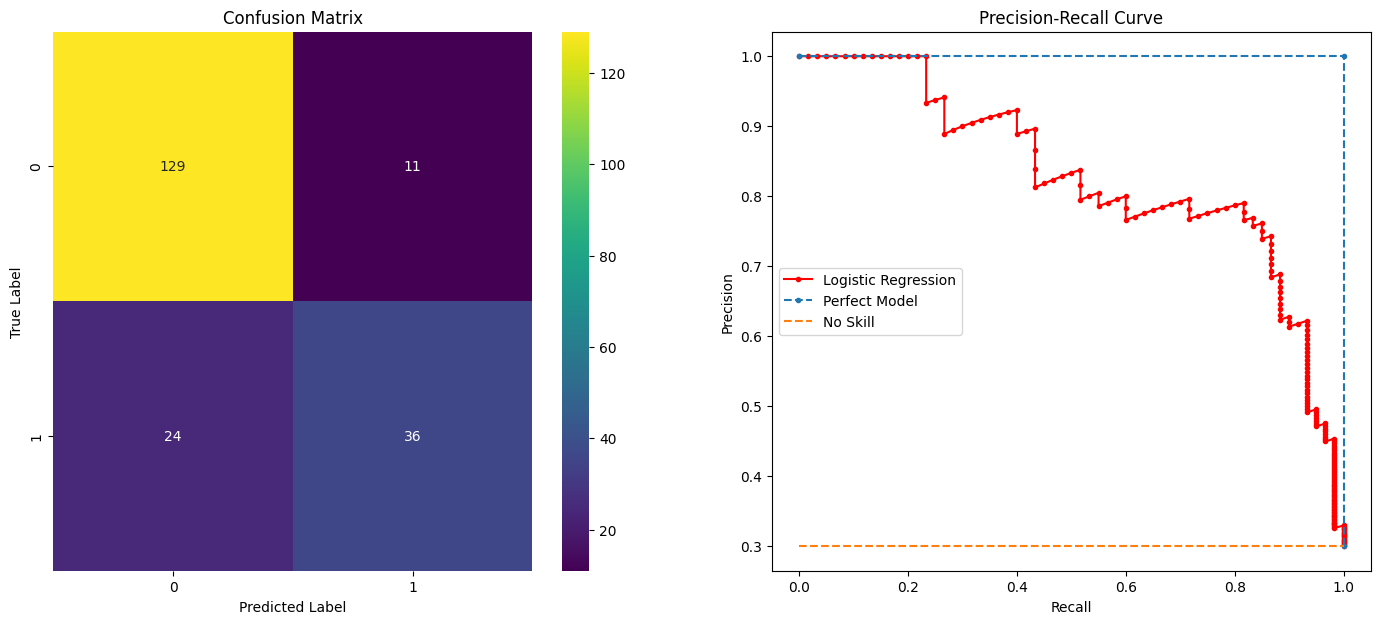

In [23]:
#importing required modules
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

Pos_Weight = 0.7
Neg_Weight = 0.3

# Generating synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, weights=[Pos_Weight, Neg_Weight], random_state=42)
 
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
# Training a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)
 
# Predicting probabilities of positive class
y_probs = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)
 
# Calculating precision score
precision = precision_score(y_test, y_pred)
 
# Calculating recall score
recall = recall_score(y_test, y_pred)
 
print("Precision:", precision)
print("Recall:", recall)
 
# Predicting classes based on the probability threshold of 0.5
y_pred_thresh = (y_probs > 0.5).astype(int)
 
# Computing confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Perfect Model
perfect_recall = [0,1,1]
perfect_precision = [1,1,Neg_Weight]
# No Skill
no_skill_recall = np.linspace(0,1,len(y_test))
no_skill_precision = np.full(len(y_test),Neg_Weight)

# Ploting the confusion matrix
plt.figure(figsize=(17, 7))
plt.subplot(1,2,1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Computing precision-recall pairs
precision, recall, _ = precision_recall_curve(y_test, y_probs)
 
plt.subplot(1,2,2)
# Ploting precision-recall curve
plt.plot(recall, precision, marker='.', color='red', label="Logistic Regression")
plt.plot(perfect_recall, perfect_precision, marker='.', linestyle="dashed" , label="Perfect Model")
plt.plot(no_skill_recall,no_skill_precision, linestyle="dashed", label = "No Skill")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

### Receiver Operating Characteristic (ROC) Curves

The ROC curve is created very similar to the precision-recall curve. But instead of calculating the precision and recall, you calculate the true and false positive rate (TPR and FPR).

The ROC curve  can be misleading with imbalanced data. When the negative class dominates, the FPR can appear low, leading to inflated performance metrics. Therefore the ROC curve is best used on balanced datasets or when both classes are equally important. It is important to be able to distinguish when to use the ROC curve and when to use the PR curve. More information on this topic can be found here: [ROC curves and PR curves for Imbalanced Classification](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-imbalanced-classification/)

The ROC Curve can be reduced to a single numerical number known as the Area Under Curve ROC (AUC ROC). As the name suggests, it is created by calculating the area under the ROC curve. A value of 1 means you have a perfect model. 

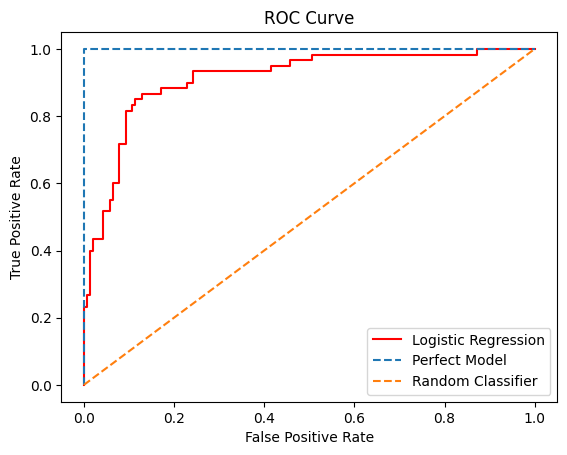

In [24]:
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_probs)

roc_auc = auc(false_positive_rate,true_positive_rate)

#Random Classifier
random_fpr = np.linspace(0,1,len(false_positive_rate))
random_tpr = np.linspace(0,1,len(false_positive_rate))

#Perfect Model
perfect_fpr = [0,0,1]
perfect_tpr = [0,1,1]

plt.plot(false_positive_rate, true_positive_rate,label="Logistic Regression", color="red")
plt.plot(perfect_fpr, perfect_tpr, label = "Perfect Model", linestyle="dashed")
plt.plot(random_fpr,random_tpr, label="Random Classifier", linestyle="dashed")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

You can learn more about precision, recall and some of their visualisations at: [A look at precision, recall and f1-score](https://towardsdatascience.com/a-look-at-precision-recall-and-f1-score-36b5fd0dd3ec)

## Hyperparameters in Classification Algorithms

Hyperparameters are critical configurations that are external to the model and must be set before training. They significantly influence the behavior of classification algorithms, affecting their performance, complexity, and generalization capabilities.

### Importance of Hyperparameters
- **Model Complexity**: Hyperparameters control the complexity, helping to balance underfitting and overfitting.
- **Training Process**: They influence the training speed and convergence.
- **Performance**: Proper tuning of hyperparameters can enhance model accuracy, precision, recall, and overall performance.

### Examples of Hyperparameters

1. **Decision Trees**
   - `max_depth`: Controls the maximum depth of the tree to prevent overfitting.
   - `min_samples_split`: Minimum number of samples required to split an internal node.

2. **Support Vector Machines (SVM)**
   - `C`: The regularization parameter, influencing the complexity of the decision boundary.
   - `kernel`: Type of kernel used (`linear`, `poly`, `rbf`), affecting the transformation of input space.

3. **Random Forest**
   - `n_estimators`: Number of trees in the forest, impacting accuracy and computational cost.
   - `max_features`: Number of features considered for the best split, affecting tree diversity.

4. **K-Nearest Neighbors (KNN)**
   - `n_neighbors`: Number of neighbors to consider for the majority vote.
   - `metric`: Distance metric used to calculate similarity (Euclidean, Manhattan).

5. **Neural Networks**
   - `learning_rate`: Step size at each iteration for moving toward a loss function minimum.
   - `batch_size`: Number of training examples used in one iteration.
   - `number of layers` and `number of units per layer`: Control the network's capacity.

### Tuning Hyperparameters
- **Grid Search**: Explores a range of values systematically to find the best combination.
- **Random Search**: Samples values from a distribution, providing an exploratory approach.
- **Bayesian Optimization**: Predicts performance and optimizes expected improvement using a probabilistic model.

Selecting and tuning the right hyperparameters is crucial for optimizing model performance, often requiring iterative experimentation.

### Types of ML Classifiers
1. **Logistic Regression
Mechanism**: Despite its name, logistic regression is used for binary classification tasks. It models the probability that a given input belongs to a particular class using the logistic function.
Difference: It's a linear model for binary classification that provides probabilities for class membership, unlike some other classifiers that directly assign class labels.
2. **Support Vector Machine (SVM)
Mechanism**: SVM finds the hyperplane that best separates different classes in the feature space. For non-linearly separable data, it uses kernel functions to transform the input space into a higher dimension where a linear separation is possible.
Difference: SVM focuses on maximizing the margin between classes, making it effective for datasets where classes are well separated. It's also versatile due to different kernel functions that can be applied.
3. **Decision Trees
Mechanism**: Decision trees split the data into subsets based on the value of input features, making binary decisions at each node until reaching a leaf node that represents a class label.
Difference: They provide a clear and interpretable model (tree structure), which is easy to understand but can easily overfit the training data.
4. **K-Nearest Neighbors (KNN)
Mechanism**: KNN classifies an input by a majority vote of its 'k' nearest neighbors in the feature space. The class with the most representatives among the nearest neighbors is chosen as the output.
Difference: KNN is a non-parametric, instance-based learning algorithm where the function is only approximated locally, and all computation is deferred until classification.
5. **Naive Bayes
Mechanism**: Based on Bayes' Theorem, Naive Bayes classifiers assume that the presence (or absence) of a particular feature of a class is unrelated to the presence (or absence) of any other feature, given the class variable.
Difference: It's particularly suited for high-dimensional data and is based on the probabilistic approach, assuming independence between predictors.
6. **Neural Networks / Deep Learning
Mechanism**: Neural networks consist of layers of interconnected nodes (neurons), where each connection represents a weight. Deep learning involves neural networks with many layers. The networks learn to map inputs to outputs through training and adjusting these weights.
Difference: Neural networks can model complex non-linear relationships and are highly flexible, making them suitable for a wide range of tasks, including image and speech recognition. However, they require large datasets and significant computational resources.
7. **Ensemble Methods (e.g., Random Forest, Gradient Boosting)
Mechanism**: Ensemble methods combine the predictions of several base estimators to improve robustness and accuracy. Random Forest uses an ensemble of decision trees, while Gradient Boosting builds one tree at a time, where each new tree helps to correct errors made by previously trained trees. \
Difference: These methods aggregate the decisions of multiple models to improve performance, often achieving higher accuracy than individual models alone. They are less prone to overfitting and can handle varied types of data effectively. \
Extreme Gradient Boosting (XGBoost) is a form of Gradient Boosting that has emerged recently with many advantages. For more information please read [XGBoost Explained, A Beginner's Guide](https://medium.com/low-code-for-advanced-data-science/xgboost-explained-a-beginners-guide-095464ad418f)

### Classification Real World Applications
1. **Healthcare**
Disease Diagnosis: Classification algorithms can analyze medical images (like X-rays or MRIs) or patient data to diagnose conditions, such as cancer, diabetes, or heart diseases, enabling early and personalized treatment plans.
Patient Risk Stratification: Classifying patients based on the risk of developing certain conditions, enabling healthcare providers to prioritize interventions and monitor high-risk patients more closely.
2. **Finance**
Fraud Detection: Classification models can distinguish between legitimate and fraudulent transactions in banking and credit card usage, significantly reducing losses due to fraud.
Credit Scoring: Lenders use classification to determine the creditworthiness of applicants, categorizing them into different risk groups to inform lending decisions.
3. **Marketing and Sales**
Customer Segmentation: Businesses classify customers into distinct groups based on purchasing behavior, preferences, and demographic data to tailor marketing strategies and enhance customer engagement.
Churn Prediction: Classification helps predict which customers are likely to stop using a service or product, allowing companies to proactively implement retention strategies.
4. **Natural Language Processing (NLP)**
Spam Detection: Email services use classification to filter out spam from genuine messages, enhancing user experience.
Sentiment Analysis: Analyzing text data (like product reviews or social media posts) to classify sentiments as positive, negative, or neutral, providing insights into customer opinions and trends.
5. **E-Commerce**
Product Categorization: Automatically classifying products into categories based on descriptions or images, streamlining product management and improving customer search experiences.
Recommendation Systems: Classifying products or content that a user is likely to be interested in based on past behavior, enhancing user engagement and sales.
6. **Cybersecurity**
Intrusion Detection: Classifying network activities or system events as normal or malicious, helping in the early detection of cyber threats and breaches.
Malware Classification: Identifying and categorizing different types of malware based on behavior and signature features, aiding in the development of targeted countermeasures.
7. **Autonomous Vehicles**
Object Detection and Classification: Identifying and classifying objects (like other vehicles, pedestrians, and road signs) in the vehicle's surroundings to make informed navigation decisions.
8. **Environmental Science**
Species Classification: Classifying animals, plants, or microorganisms into species based on genetic or image data, supporting biodiversity studies and conservation efforts.
Land Use and Land Cover Classification: Satellite images are classified to monitor changes in land use and cover, aiding in urban planning, agriculture, and climate change research.


### Get excited for ML Week 2 as we get to the truely cool stuff in ML. We'll look at
- Unsupervised Learning - What if we don't know our output?
- Dimensionality Reduction Techniques (eg. how does apple open your iPhone by looking at your face)
- Neural Networks - This is the BIGGEST, COOLEST, GOLD RUSHY OF ALL ML topics (eg. How does elon allow you to complete the latest wordle and be in the driver's seat at the same time)

# **Extra Content**
We will not have time to go over this content during the tutorial session. So make sure to have a look over it in your own time.

## Polynomial Regression Example (Non-Linear): Electricity Demand vs. Temperature
The relationship between temperature and electricity demand is often non-linear. For example, demand might increase slowly with moderate temperatures but then spike sharply as temperatures reach extremes, due to increased use of heating or cooling systems.

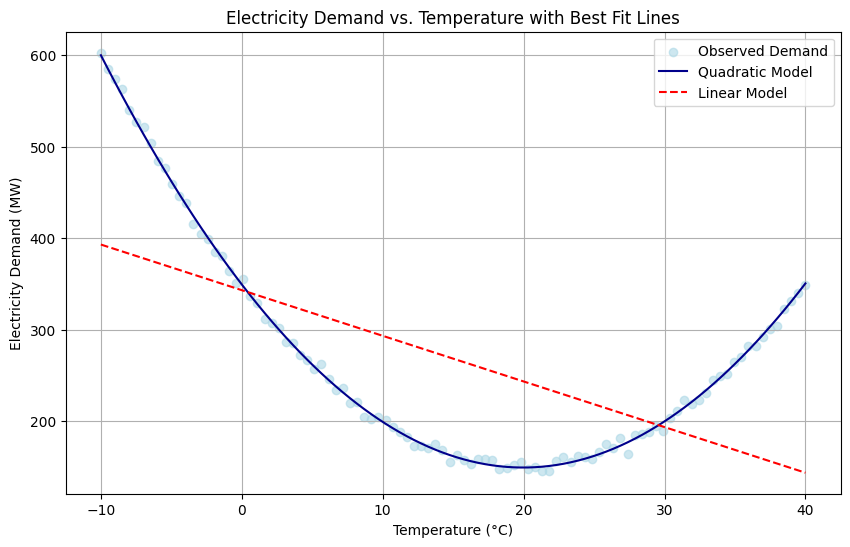

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Generating synthetic data
np.random.seed(42)
temperatures = np.linspace(-10, 40, 100)  # Temperature range from -10°C to 40°C
baseline_demand = 150  # Baseline electricity demand at 0°C in MW
# Simulated electricity demand: quadratic relationship with added noise
demand = baseline_demand + 0.5 * (temperatures - 20)**2 + np.random.normal(0, 5, temperatures.shape)

# Non-linear model function (quadratic)
def demand_model(temperature, a, b, c):
    return a * temperature**2 + b * temperature + c

# Curve fitting
params, _ = curve_fit(demand_model, temperatures, demand)

# Linear model function for comparison
def linear_demand_model(temperature, m, c):
    return m * temperature + c

# Curve fitting for the linear model
linear_params, _ = curve_fit(linear_demand_model, temperatures, demand)

# Plotting the data, non-linear fitted model, and linear fitted model for comparison
plt.figure(figsize=(10, 6))
plt.scatter(temperatures, demand, label='Observed Demand', color='lightblue', alpha=0.6)
plt.plot(temperatures, demand_model(temperatures, *params), label='Quadratic Model', color='darkblue')
plt.plot(temperatures, linear_demand_model(temperatures, *linear_params), label='Linear Model', color='red', linestyle='--')
plt.title('Electricity Demand vs. Temperature with Best Fit Lines')
plt.xlabel('Temperature (°C)')
plt.ylabel('Electricity Demand (MW)')
plt.legend()
plt.grid(True)
plt.show()

Note. For polynomial and non-linear models more generally the objective function may be minimised to a local minimum and therefore is not guaranteed to be a global minimum. It converges to a minimum by use of iterative algorithms all of which have strengths and weaknesses from an accuracy and effiency standpoint. The scipy `curve_fit` function uses the Levenberg-Marquardt Algorithm (combination of gradient descent and guass-newton method)

### Caveats of Polynomial Regression - Overfitting

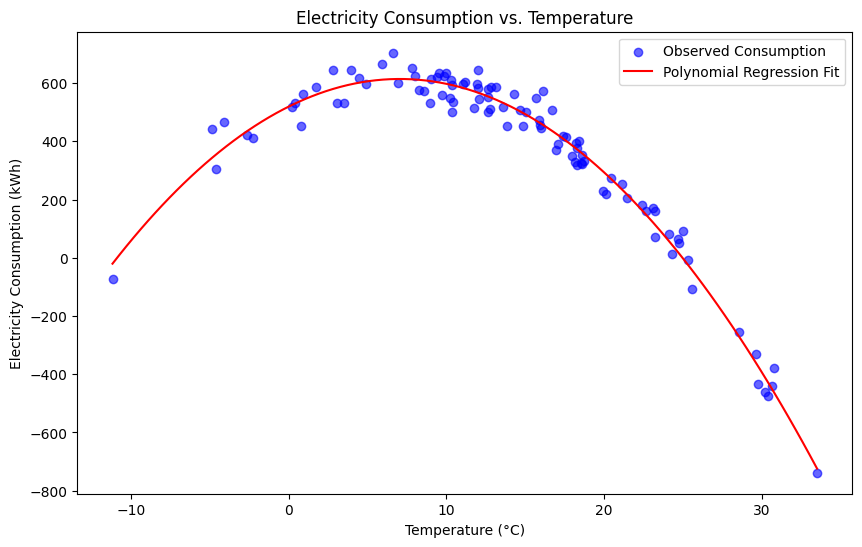

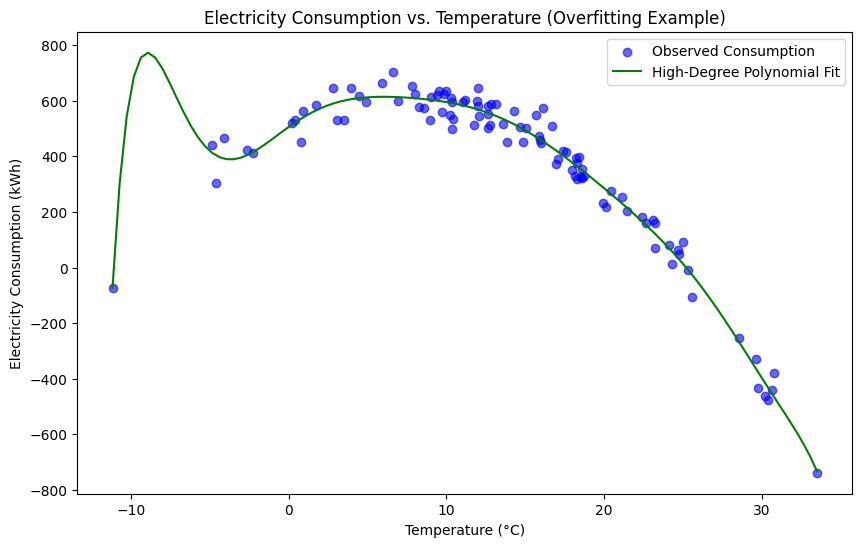

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate synthetic data for temperature and electricity consumption
np.random.seed(42)
temperatures = np.random.normal(15, 10, 100)  # Average daily temperatures (in Celsius)
# Simulated electricity consumption (in kWh), with a non-linear relationship to temperature
electricity_consumption = 500 + 30 * temperatures - 2 * temperatures**2 + np.random.normal(0, 50, 100)

# Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(temperatures, electricity_consumption, color='blue', alpha=0.6, label='Observed Consumption')
plt.xlabel('Temperature (°C)')
plt.ylabel('Electricity Consumption (kWh)')
plt.title('Electricity Consumption vs. Temperature')

# Polynomial features transformation for a 2nd-degree polynomial
poly_features = PolynomialFeatures(degree=2, include_bias=False)
temperatures_poly = poly_features.fit_transform(temperatures.reshape(-1, 1))

# Fit a linear regression model on the transformed features
lin_reg = LinearRegression()
lin_reg.fit(temperatures_poly, electricity_consumption)

# Predictions for plotting
temperatures_range = np.linspace(temperatures.min(), temperatures.max(), 100).reshape(-1, 1)
temperatures_range_poly = poly_features.transform(temperatures_range)
electricity_consumption_pred = lin_reg.predict(temperatures_range_poly)

# Plot the polynomial regression line
plt.plot(temperatures_range, electricity_consumption_pred, color='red', label='Polynomial Regression Fit')
plt.legend()
plt.show()

# Demonstrate overfitting with a higher-degree polynomial
poly_features_high_degree = PolynomialFeatures(degree=10, include_bias=False)
temperatures_poly_high_degree = poly_features_high_degree.fit_transform(temperatures.reshape(-1, 1))

# Fit a linear regression model on the high-degree transformed features
lin_reg_high_degree = LinearRegression()
lin_reg_high_degree.fit(temperatures_poly_high_degree, electricity_consumption)

# Predictions for plotting with the high-degree polynomial model
temperatures_range_poly_high_degree = poly_features_high_degree.transform(temperatures_range)
electricity_consumption_pred_high_degree = lin_reg_high_degree.predict(temperatures_range_poly_high_degree)

# Plot the high-degree polynomial regression line to demonstrate overfitting
plt.figure(figsize=(10, 6))
plt.scatter(temperatures, electricity_consumption, color='blue', alpha=0.6, label='Observed Consumption')
plt.plot(temperatures_range, electricity_consumption_pred_high_degree, color='green', label='High-Degree Polynomial Fit')
plt.xlabel('Temperature (°C)')
plt.ylabel('Electricity Consumption (kWh)')
plt.title('Electricity Consumption vs. Temperature (Overfitting Example)')
plt.legend()
plt.show()
